## Load Verification Dataset

In [ ]:
from clustering import LabelGuidedKMeansUtils
from importlib import reload
import clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
n_outputs = 5
verification_csv = '../data/v3.2.2_train.csv'
X_orig, Y_orig = LabelGuidedKMeansUtils.load_dataset(verification_csv, n_outputs)

In [ ]:
df = pd.read_csv(verification_csv)
df.head(5)

In [ ]:
X, Y = X_orig.copy(), Y_orig.copy()
X, Y = LabelGuidedKMeansUtils.remove_outliers(X, Y,tolerance= 10)

print(f'dropped {X_orig.shape[0] - X.shape[0]} outliers from {X_orig.shape[0]} inputs')
X.shape, Y.shape

## Generate Label Guided K-Means Regions

In [6]:
num_iters = 3

In [ ]:
from clustering import LabelGuidedKMeans, LabelGuidedKMeansUtils

init = 150  #Initial number of clusters for k-means. Verified experimentally through elbow method.

for iters in range(num_iters):
    
    #init_centroid dictates the mechanism which the algorithm should follow for initial centroid generation.
    #The options are 'rand','mean','first','k-means++'. Check clustering.py for further details.
    
    lgkmc = LabelGuidedKMeans().fit(X, Y,init_nclusters = init, init_centroid='mean')
    
    LabelGuidedKMeansUtils.print_summary(lgkmc)
    
    init = None


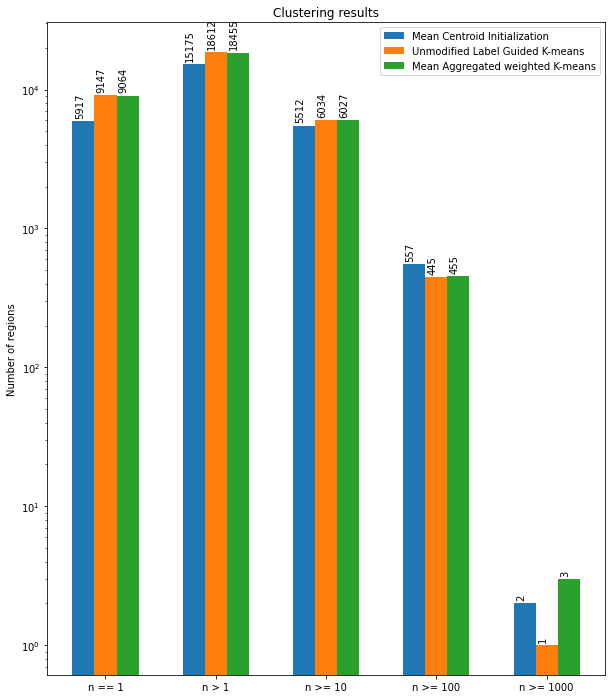

In [48]:
# # Data from the printed observation for visualization
# # reg = [['n == 1','n > 1','n >= 10','n >= 100','n >= 1000'], [5917,15175,5512,557,2]]
# # no_cen = [9147,18612,6034,445,1]
# # mean_weighted_k = [9064,18455,6027,455,3]
# x = np.arange(len(reg[0]))
# width = 0.2
# fig, ax = plt.subplots(figsize=(10,12))
# plt.yscale('log')
# rects1 = ax.bar(x-width, reg[1],width,label = 'Mean Centroid Initialization')
# rects2 = ax.bar(x, no_cen,width,label = 'Unmodified Label Guided K-means')
# rects3 = ax.bar(x+width, mean_weighted_k,width,label = 'Mean Aggregated weighted K-means')

# ax.set_ylabel('Number of regions')
# ax.set_title('Clustering results')
# ax.set_xticks(x)
# ax.set_xticklabels(reg[0])
# ax.legend()

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 3, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom',rotation = 'vertical')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

# plt.show()

In [10]:
#Run this cell to be able to execute any changes made in clustering.py without having to restart the kernel.
reload(clustering)
LabelGuidedKMeans = clustering.LabelGuidedKMeans
LabelGuidedKMeansUtils = clustering.LabelGuidedKMeansUtils

In [ ]:
# save regions
LabelGuidedKMeansUtils.save(lgkmc, outpath='../logs/test/test_regions/lgkm.p')

## Verify Regions

In [3]:
import os
from clustering import LabelGuidedKMeansUtils
from robustness import verify_regions, save_verified_regions

# load the regions
#lgkmc = LabelGuidedKMeansUtils.load('../logs/test/test_regions/lgkm.p')
lgkmc = LabelGuidedKMeansUtils.load('/home/sai/Desktop/Marabou/scad_tot/verification/lgkmc.p')
regions = lgkmc.get_regions(sort=True)
categories = lgkmc.categories
n_categories = lgkmc.n_categories
chunk_size = 100 # number of regions per chunk
min_points = 10 # minimum number of points per region
regions = [r for r in regions if r.n > min_points]
region_chunks = [regions[i:i+chunk_size] for i in range(0, len(regions), chunk_size)]

In [7]:
verified_regions = []
nnet_path = '../network/models/latest/model.nnet'
for chunk_number, subset_regions in enumerate(region_chunks):
    subset_regions = region_chunks[chunk_number]
    outdir = f'../logs/region_robustness_cexs/chunk_{chunk_number}'
    # verify subset of regions
    print(f'verifying chunk {chunk_number}')
    vregions = verify_regions(nnet_path, subset_regions, n_categories, eprec=0.0001, rpad=10, verbose=1, timeout= 240)
    verified_regions.extend(vregions)
    save_verified_regions(vregions, outdir=outdir)
    print('Verification done')

Entered<<<
Entered+++
verifying chunk 0


INFO:robustness:region 0 of 100 verified with r=0.20699999999999996, e=0.0414 (285588 ms)
INFO:robustness:region 1 of 100 verified with r=0.19800000000000004, e=0.0396 (326212 ms)
INFO:robustness:region 2 of 100 verified with r=0.16599999999999981, e=0.0332 (7202 ms)
INFO:robustness:region 3 of 100 verified with r=0.14700000000000005, e=0.0294 (145254 ms)
INFO:robustness:region 4 of 100 verified with r=0.24550000000000005, e=0.0491 (4505 ms)
INFO:robustness:region 5 of 100 verified with r=0.5030000000000001, e=0.1006 (3087 ms)
INFO:robustness:region 6 of 100 verified with r=0.11449999999999991, e=0.0229 (163372 ms)
INFO:robustness:region 7 of 100 verified with r=0.474, e=0.0948 (1795 ms)
INFO:robustness:region 8 of 100 verified with r=0.16950000000000007, e=0.0339 (7834 ms)
INFO:robustness:region 9 of 100 verified with r=0.18599999999999992, e=0.0372 (348710 ms)
INFO:robustness:region 10 of 100 verified with r=0.23850000000000002, e=0.0477 (38952 ms)
INFO:robustness:region 11 of 100 ve

INFO:robustness:region 94 of 100 verified with r=0.34700000000000003, e=0.0694 (736729 ms)
INFO:robustness:region 95 of 100 verified with r=0.10099999999999999, e=0.0202 (15664 ms)
INFO:robustness:region 96 of 100 verified with r=0.07050000000000001, e=0.0141 (5985 ms)
INFO:robustness:region 97 of 100 verified with r=0.271, e=0.0542 (17666 ms)
INFO:robustness:region 98 of 100 verified with r=0.0004999999999999609, e=0.0001 (1879 ms)
INFO:robustness:region 99 of 100 verified with r=0.08750000000000005, e=0.0175 (27396 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_0/vregions.csv


Entered<<<
Entered+++
verifying chunk 1


INFO:robustness:region 0 of 100 verified with r=0.15400000000000005, e=0.0308 (1277 ms)
INFO:robustness:region 1 of 100 verified with r=0.08900000000000002, e=0.0178 (1588 ms)
INFO:robustness:region 2 of 100 verified with r=0.12750000000000003, e=0.0255 (41379 ms)
INFO:robustness:region 3 of 100 verified with r=0.2965, e=0.0593 (30357 ms)
INFO:robustness:region 4 of 100 verified with r=0.2429999999999999, e=0.0486 (68942 ms)
INFO:robustness:region 5 of 100 verified with r=0.23700000000000004, e=0.0474 (5420 ms)
INFO:robustness:region 6 of 100 verified with r=0.09649999999999997, e=0.0193 (4522 ms)
INFO:robustness:region 7 of 100 verified with r=0.21000000000000002, e=0.042 (840 ms)
INFO:robustness:region 8 of 100 verified with r=0.18050000000000005, e=0.0361 (8088 ms)
INFO:robustness:region 9 of 100 verified with r=0.3195, e=0.0639 (69362 ms)
INFO:robustness:region 10 of 100 verified with r=0.1225, e=0.0245 (3221 ms)
INFO:robustness:region 11 of 100 verified with r=0.08750000000000013,

INFO:robustness:region 95 of 100 verified with r=0.141, e=0.0282 (207494 ms)
INFO:robustness:region 96 of 100 verified with r=0.0034999999999999615, e=0.0007 (7545 ms)
INFO:robustness:region 97 of 100 verified with r=0.000999999999999944, e=0.0002 (6075 ms)
INFO:robustness:region 98 of 100 verified with r=0.10049999999999998, e=0.0201 (9023 ms)
INFO:robustness:region 99 of 100 verified with r=0.17249999999999996, e=0.0345 (47257 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_1/vregions.csv


Entered<<<
Entered+++
verifying chunk 2


INFO:robustness:region 0 of 100 verified with r=0.2475, e=0.0495 (12225 ms)
INFO:robustness:region 1 of 100 verified with r=0.1434999999999999, e=0.0287 (5320 ms)
INFO:robustness:region 2 of 100 verified with r=0.06099999999999996, e=0.0122 (70303 ms)
INFO:robustness:region 3 of 100 verified with r=0.14650000000000013, e=0.0293 (2008 ms)
INFO:robustness:region 4 of 100 verified with r=0.18100000000000005, e=0.0362 (2734 ms)
INFO:robustness:region 5 of 100 verified with r=0.08549999999999991, e=0.0171 (252585 ms)
INFO:robustness:region 6 of 100 verified with r=0.03249999999999985, e=0.0065 (11556 ms)
INFO:robustness:region 7 of 100 verified with r=0.17299999999999993, e=0.0346 (384886 ms)
INFO:robustness:region 8 of 100 verified with r=0.12499999999999996, e=0.025 (132745 ms)
INFO:robustness:region 9 of 100 verified with r=0.17000000000000007, e=0.034 (204899 ms)
INFO:robustness:region 10 of 100 verified with r=0.07299999999999994, e=0.0146 (144997 ms)
INFO:robustness:region 11 of 100 v

INFO:robustness:region 94 of 100 verified with r=0.127, e=0.0254 (323634 ms)
INFO:robustness:region 95 of 100 verified with r=0.13050000000000006, e=0.0261 (832 ms)
INFO:robustness:region 96 of 100 verified with r=0.08549999999999995, e=0.0171 (2314 ms)
INFO:robustness:region 97 of 100 verified with r=0.126, e=0.0252 (367653 ms)
INFO:robustness:region 98 of 100 verified with r=0.18000000000000005, e=0.036 (798 ms)
INFO:robustness:region 99 of 100 verified with r=0.12450000000000003, e=0.0249 (56598 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_2/vregions.csv


Entered<<<
Entered+++
verifying chunk 3


INFO:robustness:region 0 of 100 verified with r=0.053000000000000075, e=0.0106 (60136 ms)
INFO:robustness:region 1 of 100 verified with r=0.249, e=0.0498 (136656 ms)
INFO:robustness:region 2 of 100 verified with r=0.30050000000000004, e=0.0601 (55751 ms)
INFO:robustness:region 3 of 100 verified with r=0.10000000000000005, e=0.02 (251162 ms)
INFO:robustness:region 4 of 100 verified with r=0.2885, e=0.0577 (9377 ms)
INFO:robustness:region 5 of 100 verified with r=0.0004999999999999625, e=0.0001 (259361 ms)
INFO:robustness:region 6 of 100 verified with r=0.016500000000000115, e=0.0033 (21991 ms)
INFO:robustness:region 7 of 100 verified with r=0.053500000000000034, e=0.0107 (222420 ms)
INFO:robustness:region 8 of 100 verified with r=0.09199999999999997, e=0.0184 (1716 ms)
INFO:robustness:region 9 of 100 verified with r=0.18199999999999997, e=0.0364 (22693 ms)
INFO:robustness:region 10 of 100 verified with r=0.32299999999999995, e=0.0646 (409224 ms)
INFO:robustness:region 11 of 100 verified

INFO:robustness:region 93 of 100 verified with r=0.257, e=0.0514 (9077 ms)
INFO:robustness:region 94 of 100 verified with r=0.19300000000000003, e=0.0386 (42583 ms)
INFO:robustness:region 95 of 100 verified with r=0.258, e=0.0516 (2415 ms)
INFO:robustness:region 96 of 100 verified with r=0.128, e=0.0256 (97529 ms)
INFO:robustness:region 97 of 100 verified with r=0.2129999999999999, e=0.0426 (182289 ms)
INFO:robustness:region 98 of 100 verified with r=0.12850000000000006, e=0.0257 (1883 ms)
INFO:robustness:region 99 of 100 verified with r=0.14950000000000002, e=0.0299 (2903 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_3/vregions.csv


Entered<<<
Entered+++
verifying chunk 4


INFO:robustness:region 0 of 100 verified with r=0.15149999999999997, e=0.0303 (780 ms)
INFO:robustness:region 1 of 100 verified with r=0.17800000000000005, e=0.0356 (262963 ms)
INFO:robustness:region 2 of 100 verified with r=0.47000000000000003, e=0.094 (2514382 ms)
INFO:robustness:region 3 of 100 verified with r=0.21000000000000008, e=0.042 (8608 ms)
INFO:robustness:region 4 of 100 verified with r=0.15249999999999994, e=0.0305 (2589 ms)
INFO:robustness:region 5 of 100 verified with r=0.08149999999999993, e=0.0163 (1067 ms)
INFO:robustness:region 6 of 100 verified with r=0.2495, e=0.0499 (2390 ms)
INFO:robustness:region 7 of 100 verified with r=0.07849999999999993, e=0.0157 (32869 ms)
INFO:robustness:region 8 of 100 verified with r=0.12750000000000009, e=0.0255 (755088 ms)
INFO:robustness:region 9 of 100 verified with r=0.1675, e=0.0335 (1038 ms)
INFO:robustness:region 10 of 100 verified with r=0.27249999999999996, e=0.0545 (254941 ms)
INFO:robustness:region 11 of 100 verified with r=0

INFO:robustness:region 94 of 100 verified with r=0.10549999999999991, e=0.0211 (1606 ms)
INFO:robustness:region 95 of 100 verified with r=0.14149999999999996, e=0.0283 (11658 ms)
INFO:robustness:region 96 of 100 verified with r=0.2934999999999999, e=0.0587 (49938 ms)
INFO:robustness:region 97 of 100 verified with r=0.09800000000000002, e=0.0196 (262095 ms)
INFO:robustness:region 98 of 100 verified with r=0.044, e=0.0088 (326228 ms)
INFO:robustness:region 99 of 100 verified with r=0.14750000000000008, e=0.0295 (2105 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_4/vregions.csv


Entered<<<
Entered+++
verifying chunk 5


INFO:robustness:region 0 of 100 verified with r=0.07800000000000001, e=0.0156 (3058 ms)
INFO:robustness:region 1 of 100 verified with r=0.1324999999999999, e=0.0265 (728 ms)
INFO:robustness:region 2 of 100 verified with r=0.08099999999999996, e=0.0162 (1113 ms)
INFO:robustness:region 3 of 100 verified with r=0.18749999999999997, e=0.0375 (14933 ms)
INFO:robustness:region 4 of 100 verified with r=0.18150000000000002, e=0.0363 (800 ms)
INFO:robustness:region 5 of 100 verified with r=0.15200000000000027, e=0.0304 (2934 ms)
INFO:robustness:region 6 of 100 verified with r=0.03800000000000006, e=0.0076 (1366 ms)
INFO:robustness:region 7 of 100 verified with r=0.1085000000000001, e=0.0217 (2071 ms)
INFO:robustness:region 8 of 100 verified with r=0.08149999999999995, e=0.0163 (1391 ms)
INFO:robustness:region 9 of 100 verified with r=0.09199999999999993, e=0.0184 (3457 ms)
INFO:robustness:region 10 of 100 verified with r=0.12199999999999996, e=0.0244 (18990 ms)
INFO:robustness:region 11 of 100 

INFO:robustness:region 93 of 100 verified with r=0.20100000000000004, e=0.0402 (269956 ms)
INFO:robustness:region 94 of 100 verified with r=0.13249999999999998, e=0.0265 (147024 ms)
INFO:robustness:region 95 of 100 verified with r=0.24899999999999997, e=0.0498 (87747 ms)
INFO:robustness:region 96 of 100 verified with r=0.14199999999999993, e=0.0284 (58515 ms)
INFO:robustness:region 97 of 100 verified with r=0.08599999999999995, e=0.0172 (1245 ms)
INFO:robustness:region 98 of 100 verified with r=0.2400000000000001, e=0.048 (490282 ms)
INFO:robustness:region 99 of 100 verified with r=0.06850000000000009, e=0.0137 (3523 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_5/vregions.csv


Entered<<<
Entered+++
verifying chunk 6


INFO:robustness:region 0 of 100 verified with r=0.05950000000000007, e=0.0119 (163162 ms)
INFO:robustness:region 1 of 100 verified with r=0.03300000000000002, e=0.0066 (851 ms)
INFO:robustness:region 2 of 100 verified with r=0.07600000000000007, e=0.0152 (2853 ms)
INFO:robustness:region 3 of 100 verified with r=0.14549999999999996, e=0.0291 (74078 ms)
INFO:robustness:region 4 of 100 verified with r=0.092, e=0.0184 (256287 ms)
INFO:robustness:region 5 of 100 verified with r=0.07699999999999999, e=0.0154 (2879 ms)
INFO:robustness:region 6 of 100 verified with r=0.078, e=0.0156 (3701 ms)
INFO:robustness:region 7 of 100 verified with r=0.107, e=0.0214 (24924 ms)
INFO:robustness:region 8 of 100 verified with r=0.04699999999999996, e=0.0094 (1809 ms)
INFO:robustness:region 9 of 100 verified with r=0.12900000000000003, e=0.0258 (5306 ms)
INFO:robustness:region 10 of 100 verified with r=0.075, e=0.015 (72838 ms)
INFO:robustness:region 11 of 100 verified with r=0.13099999999999995, e=0.0262 (30

INFO:robustness:region 94 of 100 verified with r=0.053000000000000026, e=0.0106 (1527 ms)
INFO:robustness:region 95 of 100 verified with r=0.0045000000000000985, e=0.0009 (27417 ms)
INFO:robustness:region 96 of 100 verified with r=0.04950000000000005, e=0.0099 (1545 ms)
INFO:robustness:region 97 of 100 verified with r=0.5065, e=0.1013 (4749418 ms)
INFO:robustness:region 98 of 100 verified with r=0.0314999999999999, e=0.0063 (151032 ms)
INFO:robustness:region 99 of 100 verified with r=0.13299999999999998, e=0.0266 (919 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_6/vregions.csv


Entered<<<
Entered+++
verifying chunk 7


INFO:robustness:region 0 of 100 verified with r=0.0004999999999999088, e=0.0001 (1411 ms)
INFO:robustness:region 1 of 100 verified with r=0.1275, e=0.0255 (69159 ms)
INFO:robustness:region 2 of 100 verified with r=0.085, e=0.017 (2222 ms)
INFO:robustness:region 3 of 100 verified with r=0.5185, e=0.1037 (770 ms)
INFO:robustness:region 4 of 100 verified with r=0.08549999999999995, e=0.0171 (2084 ms)
INFO:robustness:region 5 of 100 verified with r=0.1465, e=0.0293 (4712 ms)
INFO:robustness:region 6 of 100 verified with r=0.0004999999999999616, e=0.0001 (2393 ms)
INFO:robustness:region 7 of 100 verified with r=0.037499999999999985, e=0.0075 (2281 ms)
INFO:robustness:region 8 of 100 verified with r=0.08099999999999997, e=0.0162 (1070 ms)
INFO:robustness:region 9 of 100 verified with r=0.06850000000000003, e=0.0137 (1722 ms)
INFO:robustness:region 10 of 100 verified with r=0.1375, e=0.0275 (270880 ms)
INFO:robustness:region 11 of 100 verified with r=0.23949999999999996, e=0.0479 (254764 ms)


INFO:robustness:region 94 of 100 verified with r=0.07799999999999992, e=0.0156 (1488 ms)
INFO:robustness:region 95 of 100 verified with r=0.256, e=0.0512 (14530 ms)
INFO:robustness:region 96 of 100 verified with r=0.0004999999999999629, e=0.0001 (7708 ms)
INFO:robustness:region 97 of 100 verified with r=0.05950000000000001, e=0.0119 (268184 ms)
INFO:robustness:region 98 of 100 verified with r=0.11549999999999992, e=0.0231 (7021 ms)
INFO:robustness:region 99 of 100 verified with r=0.0004999999999999533, e=0.0001 (245165 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_7/vregions.csv


Entered<<<
Entered+++
verifying chunk 8


INFO:robustness:region 0 of 100 verified with r=0.7949999999999998, e=0.159 (8107 ms)
INFO:robustness:region 1 of 100 verified with r=0.132, e=0.0264 (1516 ms)
INFO:robustness:region 2 of 100 verified with r=0.1785, e=0.0357 (2707 ms)
INFO:robustness:region 3 of 100 verified with r=0.0004999999999999588, e=0.0001 (2032 ms)
INFO:robustness:region 4 of 100 verified with r=0.27699999999999997, e=0.0554 (254180 ms)
INFO:robustness:region 5 of 100 verified with r=0.26100000000000007, e=0.0522 (12515 ms)
INFO:robustness:region 6 of 100 verified with r=0.11700000000000002, e=0.0234 (6358 ms)
INFO:robustness:region 7 of 100 verified with r=0.07100000000000005, e=0.0142 (70978 ms)
INFO:robustness:region 8 of 100 verified with r=0.10249999999999994, e=0.0205 (3058 ms)
INFO:robustness:region 9 of 100 verified with r=0.04450000000000002, e=0.0089 (226050 ms)
INFO:robustness:region 10 of 100 verified with r=0.02450000000000001, e=0.0049 (3300 ms)
INFO:robustness:region 11 of 100 verified with r=0.1

INFO:robustness:region 93 of 100 verified with r=0.08299999999999993, e=0.0166 (282886 ms)
INFO:robustness:region 94 of 100 verified with r=0.06299999999999997, e=0.0126 (1427 ms)
INFO:robustness:region 95 of 100 verified with r=0.22550000000000014, e=0.0451 (1875 ms)
INFO:robustness:region 96 of 100 verified with r=0.0004999999999998707, e=0.0001 (1276 ms)
INFO:robustness:region 97 of 100 verified with r=0.05199999999999997, e=0.0104 (3732 ms)
INFO:robustness:region 98 of 100 verified with r=0.05950000000000006, e=0.0119 (1084 ms)
INFO:robustness:region 99 of 100 verified with r=0.04699999999999998, e=0.0094 (55992 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_8/vregions.csv


Entered<<<
Entered+++
verifying chunk 9


INFO:robustness:region 0 of 100 verified with r=0.2780000000000001, e=0.0556 (1578 ms)
INFO:robustness:region 1 of 100 verified with r=0.035500000000000066, e=0.0071 (18453 ms)
INFO:robustness:region 2 of 100 verified with r=0.036000000000000136, e=0.0072 (28785 ms)
INFO:robustness:region 3 of 100 verified with r=0.08099999999999996, e=0.0162 (5024 ms)
INFO:robustness:region 4 of 100 verified with r=0.08099999999999997, e=0.0162 (3344 ms)
INFO:robustness:region 5 of 100 verified with r=0.18599999999999997, e=0.0372 (6787 ms)
INFO:robustness:region 6 of 100 verified with r=0.08149999999999996, e=0.0163 (39669 ms)
INFO:robustness:region 7 of 100 verified with r=0.098, e=0.0196 (16153 ms)
INFO:robustness:region 8 of 100 verified with r=0.14849999999999994, e=0.0297 (17754 ms)
INFO:robustness:region 9 of 100 verified with r=0.08449999999999999, e=0.0169 (879 ms)
INFO:robustness:region 10 of 100 verified with r=0.14149999999999996, e=0.0283 (2187 ms)
INFO:robustness:region 11 of 100 verifie

INFO:robustness:region 93 of 100 verified with r=0.5279999999999999, e=0.1056 (2463 ms)
INFO:robustness:region 94 of 100 verified with r=0.21700000000000008, e=0.0434 (3732 ms)
INFO:robustness:region 95 of 100 verified with r=0.32299999999999995, e=0.0646 (2945 ms)
INFO:robustness:region 96 of 100 verified with r=0.037500000000000006, e=0.0075 (999 ms)
INFO:robustness:region 97 of 100 verified with r=0.17800000000000007, e=0.0356 (1868 ms)
INFO:robustness:region 98 of 100 verified with r=0.22299999999999998, e=0.0446 (371139 ms)
INFO:robustness:region 99 of 100 verified with r=0.03649999999999999, e=0.0073 (4363 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_9/vregions.csv


Entered<<<
Entered+++
verifying chunk 10


INFO:robustness:region 0 of 100 verified with r=0.04950000000000005, e=0.0099 (3161 ms)
INFO:robustness:region 1 of 100 verified with r=0.020000000000000014, e=0.004 (3114 ms)
INFO:robustness:region 2 of 100 verified with r=0.04199999999999993, e=0.0084 (1854 ms)
INFO:robustness:region 3 of 100 verified with r=0.11950000000000002, e=0.0239 (2888 ms)
INFO:robustness:region 4 of 100 verified with r=0.047000000000000056, e=0.0094 (1733 ms)
INFO:robustness:region 5 of 100 verified with r=0.12050000000000002, e=0.0241 (255817 ms)
INFO:robustness:region 6 of 100 verified with r=0.1485, e=0.0297 (5587 ms)
INFO:robustness:region 7 of 100 verified with r=0.148, e=0.0296 (6439 ms)
INFO:robustness:region 8 of 100 verified with r=0.14349999999999993, e=0.0287 (639 ms)
INFO:robustness:region 9 of 100 verified with r=0.08750000000000001, e=0.0175 (1320 ms)
INFO:robustness:region 10 of 100 verified with r=0.05499999999999996, e=0.011 (914 ms)
INFO:robustness:region 11 of 100 verified with r=0.0360000

INFO:robustness:region 94 of 100 verified with r=0.0004999999999999949, e=0.0001 (142518 ms)
INFO:robustness:region 95 of 100 verified with r=0.08999999999999994, e=0.018 (3600 ms)
INFO:robustness:region 96 of 100 verified with r=0.16900000000000007, e=0.0338 (3034 ms)
INFO:robustness:region 97 of 100 verified with r=0.022499999999999992, e=0.0045 (10628 ms)
INFO:robustness:region 98 of 100 verified with r=0.09149999999999996, e=0.0183 (52837 ms)
INFO:robustness:region 99 of 100 verified with r=0.05300000000000006, e=0.0106 (1225 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_10/vregions.csv


Entered<<<
Entered+++
verifying chunk 11


INFO:robustness:region 0 of 100 verified with r=0.11299999999999996, e=0.0226 (5204 ms)
INFO:robustness:region 1 of 100 verified with r=0.036000000000000025, e=0.0072 (12809 ms)
INFO:robustness:region 2 of 100 verified with r=0.0004999999999998735, e=0.0001 (6502 ms)
INFO:robustness:region 3 of 100 verified with r=0.06299999999999989, e=0.0126 (20928 ms)
INFO:robustness:region 4 of 100 verified with r=0.04249999999999991, e=0.0085 (284357 ms)
INFO:robustness:region 5 of 100 verified with r=0.022499999999999905, e=0.0045 (1062 ms)
INFO:robustness:region 6 of 100 verified with r=0.22499999999999998, e=0.045 (374233 ms)
INFO:robustness:region 7 of 100 verified with r=0.15900000000000009, e=0.0318 (255152 ms)
INFO:robustness:region 8 of 100 verified with r=0.07549999999999996, e=0.0151 (1980 ms)
INFO:robustness:region 9 of 100 verified with r=0.06749999999999994, e=0.0135 (1246 ms)
INFO:robustness:region 10 of 100 verified with r=0.07950000000000008, e=0.0159 (21277 ms)
INFO:robustness:reg

INFO:robustness:region 94 of 100 verified with r=0.03850000000000001, e=0.0077 (24679 ms)
INFO:robustness:region 95 of 100 verified with r=0.054499999999999875, e=0.0109 (4992 ms)
INFO:robustness:region 96 of 100 verified with r=0.1075, e=0.0215 (1632 ms)
INFO:robustness:region 97 of 100 verified with r=0.026, e=0.0052 (2077 ms)
INFO:robustness:region 98 of 100 verified with r=0.10299999999999987, e=0.0206 (28148 ms)
INFO:robustness:region 99 of 100 verified with r=0.060999999999999964, e=0.0122 (197714 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_11/vregions.csv


Entered<<<
Entered+++
verifying chunk 12


INFO:robustness:region 0 of 100 verified with r=0.08600000000000008, e=0.0172 (81825 ms)
INFO:robustness:region 1 of 100 verified with r=0.09249999999999989, e=0.0185 (265655 ms)
INFO:robustness:region 2 of 100 verified with r=0.13599999999999993, e=0.0272 (1673234 ms)
INFO:robustness:region 3 of 100 verified with r=0.044999999999999936, e=0.009 (5910 ms)
INFO:robustness:region 4 of 100 verified with r=0.12599999999999995, e=0.0252 (20740 ms)
INFO:robustness:region 5 of 100 verified with r=0.1380000000000001, e=0.0276 (1015 ms)
INFO:robustness:region 6 of 100 verified with r=0.20799999999999996, e=0.0416 (331176 ms)
INFO:robustness:region 7 of 100 verified with r=0.015499999999999998, e=0.0031 (1744 ms)
INFO:robustness:region 8 of 100 verified with r=0.10199999999999994, e=0.0204 (1715 ms)
INFO:robustness:region 9 of 100 verified with r=0.0655, e=0.0131 (2201 ms)
INFO:robustness:region 10 of 100 verified with r=0.05000000000000004, e=0.01 (325192 ms)
INFO:robustness:region 11 of 100 ve

INFO:robustness:region 94 of 100 verified with r=0.33100000000000007, e=0.0662 (318971 ms)
INFO:robustness:region 95 of 100 verified with r=0.08349999999999999, e=0.0167 (1287 ms)
INFO:robustness:region 96 of 100 verified with r=0.0005000000000000004, e=0.0001 (2032 ms)
INFO:robustness:region 97 of 100 verified with r=0.18150000000000005, e=0.0363 (11293 ms)
INFO:robustness:region 98 of 100 verified with r=0.21050000000000008, e=0.0421 (445765 ms)
INFO:robustness:region 99 of 100 verified with r=0.0805, e=0.0161 (485628 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_12/vregions.csv


Entered<<<
Entered+++
verifying chunk 13


INFO:robustness:region 0 of 100 verified with r=0.16849999999999993, e=0.0337 (58031 ms)
INFO:robustness:region 1 of 100 verified with r=0.08450000000000005, e=0.0169 (2714 ms)
INFO:robustness:region 2 of 100 verified with r=0.09449999999999995, e=0.0189 (27236 ms)
INFO:robustness:region 3 of 100 verified with r=0.05050000000000001, e=0.0101 (1125 ms)
INFO:robustness:region 4 of 100 verified with r=0.11299999999999981, e=0.0226 (7752 ms)
INFO:robustness:region 5 of 100 verified with r=0.7334999999999999, e=0.1467 (20062 ms)
INFO:robustness:region 6 of 100 verified with r=0.16299999999999992, e=0.0326 (946527 ms)
INFO:robustness:region 7 of 100 verified with r=0.08299999999999988, e=0.0166 (874 ms)
INFO:robustness:region 8 of 100 verified with r=0.0805, e=0.0161 (567077 ms)
INFO:robustness:region 9 of 100 verified with r=0.08349999999999995, e=0.0167 (70473 ms)
INFO:robustness:region 10 of 100 verified with r=0.029500000000000023, e=0.0059 (6207 ms)
INFO:robustness:region 11 of 100 veri

INFO:robustness:region 93 of 100 verified with r=0.088, e=0.0176 (5572 ms)
INFO:robustness:region 94 of 100 verified with r=0.258, e=0.0516 (13869 ms)
INFO:robustness:region 95 of 100 verified with r=0.06850000000000005, e=0.0137 (136620 ms)
INFO:robustness:region 96 of 100 verified with r=0.1265, e=0.0253 (29953 ms)
INFO:robustness:region 97 of 100 verified with r=0.17249999999999993, e=0.0345 (165390 ms)
INFO:robustness:region 98 of 100 verified with r=0.069, e=0.0138 (58726 ms)
INFO:robustness:region 99 of 100 verified with r=1.0979999999999996, e=0.2196 (132250 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_13/vregions.csv


Entered<<<
Entered+++
verifying chunk 14


INFO:robustness:region 0 of 100 verified with r=0.6115000000000002, e=0.1223 (6912 ms)
INFO:robustness:region 1 of 100 verified with r=0.0004999999999999588, e=0.0001 (1675 ms)
INFO:robustness:region 2 of 100 verified with r=0.161, e=0.0322 (110700 ms)
INFO:robustness:region 3 of 100 verified with r=0.2829999999999999, e=0.0566 (3271 ms)
INFO:robustness:region 4 of 100 verified with r=0.13050000000000003, e=0.0261 (267714 ms)
INFO:robustness:region 5 of 100 verified with r=0.44249999999999984, e=0.0885 (22981 ms)
INFO:robustness:region 6 of 100 verified with r=0.08399999999999991, e=0.0168 (3530 ms)
INFO:robustness:region 7 of 100 verified with r=0.20450000000000002, e=0.0409 (19372 ms)
INFO:robustness:region 8 of 100 verified with r=0.09600000000000009, e=0.0192 (2984 ms)
INFO:robustness:region 9 of 100 verified with r=0.03449999999999984, e=0.0069 (161936 ms)
INFO:robustness:region 10 of 100 verified with r=0.23349999999999996, e=0.0467 (4278 ms)
INFO:robustness:region 11 of 100 veri

INFO:robustness:region 94 of 100 verified with r=0.1829999999999999, e=0.0366 (4457 ms)
INFO:robustness:region 95 of 100 verified with r=0.028500000000000032, e=0.0057 (1493 ms)
INFO:robustness:region 96 of 100 verified with r=0.04149999999999997, e=0.0083 (2283 ms)
INFO:robustness:region 97 of 100 verified with r=0.167, e=0.0334 (188466 ms)
INFO:robustness:region 98 of 100 verified with r=0.04300000000000009, e=0.0086 (504199 ms)
INFO:robustness:region 99 of 100 verified with r=0.041999999999999954, e=0.0084 (5252 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_14/vregions.csv


Entered<<<
Entered+++
verifying chunk 15


INFO:robustness:region 0 of 100 verified with r=0.0004999999999999664, e=0.0001 (6852 ms)
INFO:robustness:region 1 of 100 verified with r=0.13650000000000004, e=0.0273 (403999 ms)
INFO:robustness:region 2 of 100 verified with r=0.0005000000000000041, e=0.0001 (2117 ms)
INFO:robustness:region 3 of 100 verified with r=0.020999999999999946, e=0.0042 (240155 ms)
INFO:robustness:region 4 of 100 verified with r=0.28700000000000003, e=0.0574 (14677 ms)
INFO:robustness:region 5 of 100 verified with r=0.0005000000000000025, e=0.0001 (1772 ms)
INFO:robustness:region 6 of 100 verified with r=0.06950000000000006, e=0.0139 (1765 ms)
INFO:robustness:region 7 of 100 verified with r=0.29849999999999993, e=0.0597 (124709 ms)
INFO:robustness:region 8 of 100 verified with r=0.06399999999999995, e=0.0128 (1085 ms)
INFO:robustness:region 9 of 100 verified with r=0.9244999999999999, e=0.1849 (102191 ms)
INFO:robustness:region 10 of 100 verified with r=0.0010000000000000221, e=0.0002 (2209 ms)
INFO:robustnes

INFO:robustness:region 93 of 100 verified with r=0.09949999999999995, e=0.0199 (60389 ms)
INFO:robustness:region 94 of 100 verified with r=0.20249999999999996, e=0.0405 (13047 ms)
INFO:robustness:region 95 of 100 verified with r=0.12299999999999993, e=0.0246 (1431 ms)
INFO:robustness:region 96 of 100 verified with r=0.018000000000000054, e=0.0036 (4137 ms)
INFO:robustness:region 97 of 100 verified with r=0.000499999999999956, e=0.0001 (3346 ms)
INFO:robustness:region 98 of 100 verified with r=0.0004999999999999582, e=0.0001 (1864 ms)
INFO:robustness:region 99 of 100 verified with r=0.009000000000000057, e=0.0018 (4881 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_15/vregions.csv


Entered<<<
Entered+++
verifying chunk 16


INFO:robustness:region 0 of 100 verified with r=0.091, e=0.0182 (1946 ms)
INFO:robustness:region 1 of 100 verified with r=0.21649999999999994, e=0.0433 (8985 ms)
INFO:robustness:region 2 of 100 verified with r=0.06000000000000004, e=0.012 (3691 ms)
INFO:robustness:region 3 of 100 verified with r=0.025500000000000068, e=0.0051 (258581 ms)
INFO:robustness:region 4 of 100 verified with r=0.06499999999999993, e=0.013 (49629 ms)
INFO:robustness:region 5 of 100 verified with r=0.06249999999999997, e=0.0125 (3170 ms)
INFO:robustness:region 6 of 100 verified with r=0.05649999999999998, e=0.0113 (1226 ms)
INFO:robustness:region 7 of 100 verified with r=0.06600000000000003, e=0.0132 (80645 ms)
INFO:robustness:region 8 of 100 verified with r=0.14050000000000004, e=0.0281 (6448 ms)
INFO:robustness:region 9 of 100 verified with r=0.1235, e=0.0247 (3692 ms)
INFO:robustness:region 10 of 100 verified with r=0.08900000000000008, e=0.0178 (1471 ms)
INFO:robustness:region 11 of 100 verified with r=0.1000

INFO:robustness:region 93 of 100 verified with r=0.206, e=0.0412 (261931 ms)
INFO:robustness:region 94 of 100 verified with r=0.0004999999999998617, e=0.0001 (1792 ms)
INFO:robustness:region 95 of 100 verified with r=0.0005000000000000421, e=0.0001 (2208 ms)
INFO:robustness:region 96 of 100 verified with r=0.000500000000000013, e=0.0001 (19692 ms)
INFO:robustness:region 97 of 100 verified with r=0.14349999999999993, e=0.0287 (2028 ms)
INFO:robustness:region 98 of 100 verified with r=0.1969999999999999, e=0.0394 (3437 ms)
INFO:robustness:region 99 of 100 verified with r=0.08999999999999994, e=0.018 (3096 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_16/vregions.csv


Entered<<<
Entered+++
verifying chunk 17


INFO:robustness:region 0 of 100 verified with r=0.03550000000000005, e=0.0071 (5576 ms)
INFO:robustness:region 1 of 100 verified with r=0.02000000000000001, e=0.004 (7431 ms)
INFO:robustness:region 2 of 100 verified with r=0.21050000000000008, e=0.0421 (289408 ms)
INFO:robustness:region 3 of 100 verified with r=0.06950000000000008, e=0.0139 (1314 ms)
INFO:robustness:region 4 of 100 verified with r=0.22000000000000003, e=0.044 (23531 ms)
INFO:robustness:region 5 of 100 verified with r=0.0005000000000000033, e=0.0001 (7595 ms)
INFO:robustness:region 6 of 100 verified with r=0.09249999999999993, e=0.0185 (21156 ms)
INFO:robustness:region 7 of 100 verified with r=0.05850000000000008, e=0.0117 (538095 ms)
INFO:robustness:region 8 of 100 verified with r=0.01400000000000004, e=0.0028 (3203 ms)
INFO:robustness:region 9 of 100 verified with r=0.09050000000000001, e=0.0181 (30131 ms)
INFO:robustness:region 10 of 100 verified with r=0.07950000000000007, e=0.0159 (6989 ms)
INFO:robustness:region 1

INFO:robustness:region 93 of 100 verified with r=0.0004999999999998672, e=0.0001 (1580 ms)
INFO:robustness:region 94 of 100 verified with r=0.2805000000000001, e=0.0561 (269974 ms)
INFO:robustness:region 95 of 100 verified with r=0.12199999999999996, e=0.0244 (2930 ms)
INFO:robustness:region 96 of 100 verified with r=0.11749999999999995, e=0.0235 (154836 ms)
INFO:robustness:region 97 of 100 verified with r=0.0004999999999999588, e=0.0001 (402499 ms)
INFO:robustness:region 98 of 100 verified with r=0.0005000000000000025, e=0.0001 (10414 ms)
INFO:robustness:region 99 of 100 verified with r=0.07400000000000001, e=0.0148 (1322 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_17/vregions.csv


Entered<<<
Entered+++
verifying chunk 18


INFO:robustness:region 0 of 100 verified with r=0.10449999999999993, e=0.0209 (3187 ms)
INFO:robustness:region 1 of 100 verified with r=0.0004999999999999588, e=0.0001 (1979 ms)
INFO:robustness:region 2 of 100 verified with r=0.04049999999999998, e=0.0081 (1721 ms)
INFO:robustness:region 3 of 100 verified with r=0.0004999999999999678, e=0.0001 (1517 ms)
INFO:robustness:region 4 of 100 verified with r=0.21749999999999997, e=0.0435 (9775 ms)
INFO:robustness:region 5 of 100 verified with r=0.18249999999999994, e=0.0365 (304534 ms)
INFO:robustness:region 6 of 100 verified with r=0.000499999999999956, e=0.0001 (16185 ms)
INFO:robustness:region 7 of 100 verified with r=0.1865, e=0.0373 (5714 ms)
INFO:robustness:region 8 of 100 verified with r=0.10099999999999998, e=0.0202 (4225 ms)
INFO:robustness:region 9 of 100 verified with r=0.06199999999999996, e=0.0124 (6033 ms)
INFO:robustness:region 10 of 100 verified with r=0.0004999999999999616, e=0.0001 (1022 ms)
INFO:robustness:region 11 of 100 v

INFO:robustness:region 93 of 100 verified with r=0.087, e=0.0174 (3352 ms)
INFO:robustness:region 94 of 100 verified with r=0.11299999999999992, e=0.0226 (934 ms)
INFO:robustness:region 95 of 100 verified with r=0.08499999999999991, e=0.017 (3637 ms)
INFO:robustness:region 96 of 100 verified with r=0.09799999999999999, e=0.0196 (12535 ms)
INFO:robustness:region 97 of 100 verified with r=0.11949999999999998, e=0.0239 (556723 ms)
INFO:robustness:region 98 of 100 verified with r=0.15849999999999997, e=0.0317 (251917 ms)
INFO:robustness:region 99 of 100 verified with r=0.38000000000000006, e=0.076 (40792 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_18/vregions.csv


Entered<<<
Entered+++
verifying chunk 19


INFO:robustness:region 0 of 100 verified with r=0.05500000000000011, e=0.011 (2048 ms)
INFO:robustness:region 1 of 100 verified with r=0.0004999999999999949, e=0.0001 (39734 ms)
INFO:robustness:region 2 of 100 verified with r=0.0005000000000000441, e=0.0001 (45354 ms)
INFO:robustness:region 3 of 100 verified with r=0.10099999999999998, e=0.0202 (258917 ms)
INFO:robustness:region 4 of 100 verified with r=0.7629999999999999, e=0.1526 (3847 ms)
INFO:robustness:region 5 of 100 verified with r=0.22350000000000023, e=0.0447 (20211 ms)
INFO:robustness:region 6 of 100 verified with r=0.03650000000000001, e=0.0073 (29435 ms)
INFO:robustness:region 7 of 100 verified with r=0.15750000000000006, e=0.0315 (1630 ms)
INFO:robustness:region 8 of 100 verified with r=0.09949999999999996, e=0.0199 (4035 ms)
INFO:robustness:region 9 of 100 verified with r=0.06349999999999997, e=0.0127 (101223 ms)
INFO:robustness:region 10 of 100 verified with r=0.17450000000000002, e=0.0349 (406193 ms)
INFO:robustness:reg

INFO:robustness:region 94 of 100 verified with r=0.05399999999999996, e=0.0108 (1959 ms)
INFO:robustness:region 95 of 100 verified with r=0.00950000000000005, e=0.0019 (2900 ms)
INFO:robustness:region 96 of 100 verified with r=0.0365, e=0.0073 (2132 ms)
INFO:robustness:region 97 of 100 verified with r=0.008500000000000004, e=0.0017 (2307 ms)
INFO:robustness:region 98 of 100 verified with r=0.09499999999999992, e=0.019 (2475 ms)
INFO:robustness:region 99 of 100 verified with r=0.04050000000000003, e=0.0081 (2378 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_19/vregions.csv


Entered<<<
Entered+++
verifying chunk 20


INFO:robustness:region 0 of 100 verified with r=0.0004999999999999609, e=0.0001 (251894 ms)
INFO:robustness:region 1 of 100 verified with r=0.23500000000000007, e=0.047 (47741 ms)
INFO:robustness:region 2 of 100 verified with r=0.14650000000000002, e=0.0293 (13982 ms)
INFO:robustness:region 3 of 100 verified with r=0.03550000000000011, e=0.0071 (113813 ms)
INFO:robustness:region 4 of 100 verified with r=0.033999999999999996, e=0.0068 (4737 ms)
INFO:robustness:region 5 of 100 verified with r=0.08349999999999999, e=0.0167 (1565 ms)
INFO:robustness:region 6 of 100 verified with r=0.09200000000000005, e=0.0184 (4553 ms)
INFO:robustness:region 7 of 100 verified with r=0.0004999999999999616, e=0.0001 (990 ms)
INFO:robustness:region 8 of 100 verified with r=0.02050000000000006, e=0.0041 (4154 ms)
INFO:robustness:region 9 of 100 verified with r=0.23099999999999987, e=0.0462 (938 ms)
INFO:robustness:region 10 of 100 verified with r=0.0004999999999999672, e=0.0001 (2596 ms)
INFO:robustness:regio

INFO:robustness:region 92 of 100 verified with r=0.04399999999999991, e=0.0088 (8530 ms)
INFO:robustness:region 93 of 100 verified with r=0.042999999999999976, e=0.0086 (7590 ms)
INFO:robustness:region 94 of 100 verified with r=0.025500000000000068, e=0.0051 (253880 ms)
INFO:robustness:region 95 of 100 verified with r=0.052499999999999894, e=0.0105 (18506 ms)
INFO:robustness:region 96 of 100 verified with r=0.061500000000000006, e=0.0123 (599285 ms)
INFO:robustness:region 97 of 100 verified with r=0.087, e=0.0174 (397361 ms)
INFO:robustness:region 98 of 100 verified with r=0.06050000000000008, e=0.0121 (10800 ms)
INFO:robustness:region 99 of 100 verified with r=0.0, e=0.0 (2158 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_20/vregions.csv


Entered<<<
Entered+++
verifying chunk 21


INFO:robustness:region 0 of 100 verified with r=0.07700000000000003, e=0.0154 (3341 ms)
INFO:robustness:region 1 of 100 verified with r=0.07299999999999993, e=0.0146 (2962 ms)
INFO:robustness:region 2 of 100 verified with r=0.07850000000000007, e=0.0157 (543585 ms)
INFO:robustness:region 3 of 100 verified with r=0.2555, e=0.0511 (127286 ms)
INFO:robustness:region 4 of 100 verified with r=0.19900000000000007, e=0.0398 (191998 ms)
INFO:robustness:region 5 of 100 verified with r=0.04599999999999997, e=0.0092 (127766 ms)
INFO:robustness:region 6 of 100 verified with r=0.053999999999999944, e=0.0108 (2768 ms)
INFO:robustness:region 7 of 100 verified with r=0.12750000000000006, e=0.0255 (325377 ms)
INFO:robustness:region 8 of 100 verified with r=0.05249999999999995, e=0.0105 (10062 ms)
INFO:robustness:region 9 of 100 verified with r=0.0004999999999999651, e=0.0001 (3378 ms)
INFO:robustness:region 10 of 100 verified with r=0.37549999999999994, e=0.0751 (1769342 ms)
INFO:robustness:region 11 o

INFO:robustness:region 93 of 100 verified with r=0.012999999999999932, e=0.0026 (2313 ms)
INFO:robustness:region 94 of 100 verified with r=0.06850000000000006, e=0.0137 (8683 ms)
INFO:robustness:region 95 of 100 verified with r=0.0004999999999999681, e=0.0001 (2443 ms)
INFO:robustness:region 96 of 100 verified with r=0.0004999999999999588, e=0.0001 (37194 ms)
INFO:robustness:region 97 of 100 verified with r=0.0019999999999999593, e=0.0004 (165437 ms)
INFO:robustness:region 98 of 100 verified with r=0.08249999999999996, e=0.0165 (2974 ms)
INFO:robustness:region 99 of 100 verified with r=0.0005000000000000033, e=0.0001 (1181 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_21/vregions.csv


Entered<<<
Entered+++
verifying chunk 22


INFO:robustness:region 0 of 100 verified with r=0.07900000000000008, e=0.0158 (867 ms)
INFO:robustness:region 1 of 100 verified with r=0.03649999999999999, e=0.0073 (1235 ms)
INFO:robustness:region 2 of 100 verified with r=0.0004999999999999701, e=0.0001 (534 ms)
INFO:robustness:region 3 of 100 verified with r=0.10299999999999986, e=0.0206 (71716 ms)
INFO:robustness:region 4 of 100 verified with r=0.07549999999999994, e=0.0151 (3308 ms)
INFO:robustness:region 5 of 100 verified with r=0.049000000000000016, e=0.0098 (537734 ms)
INFO:robustness:region 6 of 100 verified with r=0.031000000000000007, e=0.0062 (6960 ms)
INFO:robustness:region 7 of 100 verified with r=0.2445, e=0.0489 (2294 ms)
INFO:robustness:region 8 of 100 verified with r=0.000499999999999956, e=0.0001 (273960 ms)
INFO:robustness:region 9 of 100 verified with r=0.015499999999999946, e=0.0031 (20645 ms)
INFO:robustness:region 10 of 100 verified with r=0.030499999999999982, e=0.0061 (98680 ms)
INFO:robustness:region 11 of 100

INFO:robustness:region 93 of 100 verified with r=0.0004999999999999588, e=0.0001 (10754 ms)
INFO:robustness:region 94 of 100 verified with r=0.23249999999999996, e=0.0465 (531455 ms)
INFO:robustness:region 95 of 100 verified with r=0.09950000000000003, e=0.0199 (4667 ms)
INFO:robustness:region 96 of 100 verified with r=0.15799999999999997, e=0.0316 (300533 ms)
INFO:robustness:region 97 of 100 verified with r=0.0655, e=0.0131 (2159 ms)
INFO:robustness:region 98 of 100 verified with r=0.14499999999999993, e=0.029 (10827 ms)
INFO:robustness:region 99 of 100 verified with r=0.09299999999999993, e=0.0186 (1479 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_22/vregions.csv


Entered<<<
Entered+++
verifying chunk 23


INFO:robustness:region 0 of 100 verified with r=0.012000000000000005, e=0.0024 (77853 ms)
INFO:robustness:region 1 of 100 verified with r=0.25849999999999995, e=0.0517 (19762 ms)
INFO:robustness:region 2 of 100 verified with r=0.259, e=0.0518 (3198 ms)
INFO:robustness:region 3 of 100 verified with r=0.0665, e=0.0133 (2480 ms)
INFO:robustness:region 4 of 100 verified with r=0.12150000000000012, e=0.0243 (1958 ms)
INFO:robustness:region 5 of 100 verified with r=0.05649999999999996, e=0.0113 (5648 ms)
INFO:robustness:region 6 of 100 verified with r=0.07400000000000001, e=0.0148 (28292 ms)
INFO:robustness:region 7 of 100 verified with r=0.11400000000000007, e=0.0228 (194176 ms)
INFO:robustness:region 8 of 100 verified with r=0.3839999999999999, e=0.0768 (21964 ms)
INFO:robustness:region 9 of 100 verified with r=0.644, e=0.1288 (35258 ms)
INFO:robustness:region 10 of 100 verified with r=0.026999999999999955, e=0.0054 (28234 ms)
INFO:robustness:region 11 of 100 verified with r=0.0, e=0.0 (42

INFO:robustness:region 93 of 100 verified with r=0.12850000000000006, e=0.0257 (56045 ms)
INFO:robustness:region 94 of 100 verified with r=0.04800000000000019, e=0.0096 (1457 ms)
INFO:robustness:region 95 of 100 verified with r=0.018000000000000037, e=0.0036 (2332 ms)
INFO:robustness:region 96 of 100 verified with r=0.08249999999999996, e=0.0165 (1765 ms)
INFO:robustness:region 97 of 100 verified with r=0.05300000000000012, e=0.0106 (410577 ms)
INFO:robustness:region 98 of 100 verified with r=0.024999999999999994, e=0.005 (1798 ms)
INFO:robustness:region 99 of 100 verified with r=0.08799999999999995, e=0.0176 (1549 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_23/vregions.csv


Entered<<<
Entered+++
verifying chunk 24


INFO:robustness:region 0 of 100 verified with r=0.0790000000000001, e=0.0158 (6317 ms)
INFO:robustness:region 1 of 100 verified with r=0.08399999999999999, e=0.0168 (1126 ms)
INFO:robustness:region 2 of 100 verified with r=0.04249999999999996, e=0.0085 (5332 ms)
INFO:robustness:region 3 of 100 verified with r=0.08799999999999993, e=0.0176 (1577 ms)
INFO:robustness:region 4 of 100 verified with r=0.0004999999999999616, e=0.0001 (1988 ms)
INFO:robustness:region 5 of 100 verified with r=0.2395, e=0.0479 (38635 ms)
INFO:robustness:region 6 of 100 verified with r=0.020000000000000014, e=0.004 (2839 ms)
INFO:robustness:region 7 of 100 verified with r=0.2015, e=0.0403 (8823 ms)
INFO:robustness:region 8 of 100 verified with r=0.000499999999999966, e=0.0001 (2118 ms)
INFO:robustness:region 9 of 100 verified with r=0.1285000000000001, e=0.0257 (835 ms)
INFO:robustness:region 10 of 100 verified with r=0.11299999999999993, e=0.0226 (4519 ms)
INFO:robustness:region 11 of 100 verified with r=0.11449

INFO:robustness:region 93 of 100 verified with r=0.2775000000000001, e=0.0555 (7443 ms)
INFO:robustness:region 94 of 100 verified with r=0.10350000000000001, e=0.0207 (90073 ms)
INFO:robustness:region 95 of 100 verified with r=0.10650000000000003, e=0.0213 (11494 ms)
INFO:robustness:region 96 of 100 verified with r=0.01499999999999999, e=0.003 (8659 ms)
INFO:robustness:region 97 of 100 verified with r=0.0004999999999999505, e=0.0001 (362042 ms)
INFO:robustness:region 98 of 100 verified with r=0.000500000000000015, e=0.0001 (2847 ms)
INFO:robustness:region 99 of 100 verified with r=0.00900000000000003, e=0.0018 (2005 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_24/vregions.csv


Entered<<<
Entered+++
verifying chunk 25


INFO:robustness:region 0 of 100 verified with r=0.078, e=0.0156 (116343 ms)
INFO:robustness:region 1 of 100 verified with r=0.010999999999999965, e=0.0022 (141187 ms)
INFO:robustness:region 2 of 100 verified with r=0.06900000000000009, e=0.0138 (2533 ms)
INFO:robustness:region 3 of 100 verified with r=0.014999999999999989, e=0.003 (9219 ms)
INFO:robustness:region 4 of 100 verified with r=0.0005000000000000449, e=0.0001 (672 ms)
INFO:robustness:region 5 of 100 verified with r=0.19050000000000006, e=0.0381 (5431 ms)
INFO:robustness:region 6 of 100 verified with r=0.03350000000000002, e=0.0067 (7040 ms)
INFO:robustness:region 7 of 100 verified with r=0.01099999999999995, e=0.0022 (2370 ms)
INFO:robustness:region 8 of 100 verified with r=0.0004999999999999727, e=0.0001 (1775 ms)
INFO:robustness:region 9 of 100 verified with r=0.05350000000000004, e=0.0107 (4612 ms)
INFO:robustness:region 10 of 100 verified with r=0.05849999999999998, e=0.0117 (2427 ms)
INFO:robustness:region 11 of 100 veri

INFO:robustness:region 94 of 100 verified with r=0.09849999999999995, e=0.0197 (18111 ms)
INFO:robustness:region 95 of 100 verified with r=0.010999999999999963, e=0.0022 (615847 ms)
INFO:robustness:region 96 of 100 verified with r=0.05400000000000007, e=0.0108 (15877 ms)
INFO:robustness:region 97 of 100 verified with r=0.0005000000000000094, e=0.0001 (3543 ms)
INFO:robustness:region 98 of 100 verified with r=0.016499999999999976, e=0.0033 (8403 ms)
INFO:robustness:region 99 of 100 verified with r=0.07099999999999997, e=0.0142 (21925 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_25/vregions.csv


Entered<<<
Entered+++
verifying chunk 26


INFO:robustness:region 0 of 100 verified with r=0.038000000000000096, e=0.0076 (5060 ms)
INFO:robustness:region 1 of 100 verified with r=0.28600000000000003, e=0.0572 (1280 ms)
INFO:robustness:region 2 of 100 verified with r=0.028500000000000057, e=0.0057 (2205 ms)
INFO:robustness:region 3 of 100 verified with r=0.011999999999999997, e=0.0024 (3698 ms)
INFO:robustness:region 4 of 100 verified with r=0.06749999999999998, e=0.0135 (41820 ms)
INFO:robustness:region 5 of 100 verified with r=0.1275, e=0.0255 (2133 ms)
INFO:robustness:region 6 of 100 verified with r=0.0004999999999999588, e=0.0001 (2361 ms)
INFO:robustness:region 7 of 100 verified with r=0.05049999999999999, e=0.0101 (2496 ms)
INFO:robustness:region 8 of 100 verified with r=0.0004999999999999699, e=0.0001 (2249 ms)
INFO:robustness:region 9 of 100 verified with r=0.22000000000000008, e=0.044 (316703 ms)
INFO:robustness:region 10 of 100 verified with r=0.0004999999999999588, e=0.0001 (13031 ms)
INFO:robustness:region 11 of 100

INFO:robustness:region 93 of 100 verified with r=0.023000000000000017, e=0.0046 (2621 ms)
INFO:robustness:region 94 of 100 verified with r=0.13849999999999987, e=0.0277 (2073 ms)
INFO:robustness:region 95 of 100 verified with r=0.0004999999999999616, e=0.0001 (7562 ms)
INFO:robustness:region 96 of 100 verified with r=0.12299999999999996, e=0.0246 (7034 ms)
INFO:robustness:region 97 of 100 verified with r=0.07900000000000003, e=0.0158 (3726 ms)
INFO:robustness:region 98 of 100 verified with r=0.0004999999999999603, e=0.0001 (5489 ms)
INFO:robustness:region 99 of 100 verified with r=0.025000000000000015, e=0.005 (4963 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_26/vregions.csv


Entered<<<
Entered+++
verifying chunk 27


INFO:robustness:region 0 of 100 verified with r=0.010000000000000009, e=0.002 (417749 ms)
INFO:robustness:region 1 of 100 verified with r=0.192, e=0.0384 (5273 ms)
INFO:robustness:region 2 of 100 verified with r=0.08649999999999997, e=0.0173 (188216 ms)
INFO:robustness:region 3 of 100 verified with r=0.07149999999999995, e=0.0143 (8336 ms)
INFO:robustness:region 4 of 100 verified with r=0.0004999999999999588, e=0.0001 (9088 ms)
INFO:robustness:region 5 of 100 verified with r=0.0004999999999999616, e=0.0001 (5348 ms)
INFO:robustness:region 6 of 100 verified with r=0.0435, e=0.0087 (30725 ms)
INFO:robustness:region 7 of 100 verified with r=0.09199999999999994, e=0.0184 (197388 ms)
INFO:robustness:region 8 of 100 verified with r=0.17349999999999996, e=0.0347 (5045 ms)
INFO:robustness:region 9 of 100 verified with r=0.04800000000000006, e=0.0096 (3341 ms)
INFO:robustness:region 10 of 100 verified with r=0.04650000000000006, e=0.0093 (207104 ms)
INFO:robustness:region 11 of 100 verified wit

INFO:robustness:region 93 of 100 verified with r=0.017000000000000057, e=0.0034 (3404 ms)
INFO:robustness:region 94 of 100 verified with r=0.0024999999999999467, e=0.0005 (42254 ms)
INFO:robustness:region 95 of 100 verified with r=0.10049999999999994, e=0.0201 (34904 ms)
INFO:robustness:region 96 of 100 verified with r=0.1615, e=0.0323 (5983 ms)
INFO:robustness:region 97 of 100 verified with r=0.12550000000000008, e=0.0251 (2290 ms)
INFO:robustness:region 98 of 100 verified with r=0.03900000000000002, e=0.0078 (44431 ms)
INFO:robustness:region 99 of 100 verified with r=0.0395, e=0.0079 (2454 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_27/vregions.csv


Entered<<<
Entered+++
verifying chunk 28


INFO:robustness:region 0 of 100 verified with r=0.06050000000000004, e=0.0121 (163764 ms)
INFO:robustness:region 1 of 100 verified with r=0.03349999999999997, e=0.0067 (38308 ms)
INFO:robustness:region 2 of 100 verified with r=0.016500000000000025, e=0.0033 (1308 ms)
INFO:robustness:region 3 of 100 verified with r=0.0, e=0.0 (2396 ms)
INFO:robustness:region 4 of 100 verified with r=0.02750000000000002, e=0.0055 (3636 ms)
INFO:robustness:region 5 of 100 verified with r=0.0, e=0.0 (6132 ms)
INFO:robustness:region 6 of 100 verified with r=0.043500000000000066, e=0.0087 (520828 ms)
INFO:robustness:region 7 of 100 verified with r=0.02099999999999996, e=0.0042 (253141 ms)
INFO:robustness:region 8 of 100 verified with r=0.04499999999999996, e=0.009 (94980 ms)
INFO:robustness:region 9 of 100 verified with r=0.05900000000000007, e=0.0118 (15078 ms)
INFO:robustness:region 10 of 100 verified with r=0.23900000000000005, e=0.0478 (2962 ms)
INFO:robustness:region 11 of 100 verified with r=0.07799999

INFO:robustness:region 93 of 100 verified with r=0.033000000000000036, e=0.0066 (2925 ms)
INFO:robustness:region 94 of 100 verified with r=0.029999999999999978, e=0.006 (1295 ms)
INFO:robustness:region 95 of 100 verified with r=0.026000000000000023, e=0.0052 (1047 ms)
INFO:robustness:region 96 of 100 verified with r=0.000500000000000006, e=0.0001 (2702 ms)
INFO:robustness:region 97 of 100 verified with r=0.1815, e=0.0363 (7128 ms)
INFO:robustness:region 98 of 100 verified with r=0.09349999999999994, e=0.0187 (3816 ms)
INFO:robustness:region 99 of 100 verified with r=0.17099999999999987, e=0.0342 (4504 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_28/vregions.csv


Entered<<<
Entered+++
verifying chunk 29


INFO:robustness:region 0 of 100 verified with r=0.37949999999999995, e=0.0759 (82189 ms)
INFO:robustness:region 1 of 100 verified with r=0.11650000000000002, e=0.0233 (1598 ms)
INFO:robustness:region 2 of 100 verified with r=0.0004999999999999664, e=0.0001 (740361 ms)
INFO:robustness:region 3 of 100 verified with r=0.12100000000000001, e=0.0242 (879 ms)
INFO:robustness:region 4 of 100 verified with r=0.03449999999999997, e=0.0069 (6806 ms)
INFO:robustness:region 5 of 100 verified with r=0.1470000000000001, e=0.0294 (1728 ms)
INFO:robustness:region 6 of 100 verified with r=0.03349999999999999, e=0.0067 (72830 ms)
INFO:robustness:region 7 of 100 verified with r=0.018000000000000037, e=0.0036 (272008 ms)
INFO:robustness:region 8 of 100 verified with r=0.33850000000000013, e=0.0677 (6824 ms)
INFO:robustness:region 9 of 100 verified with r=0.0004999999999998214, e=0.0001 (26039 ms)
INFO:robustness:region 10 of 100 verified with r=0.05349999999999992, e=0.0107 (1778 ms)
INFO:robustness:regio

INFO:robustness:region 93 of 100 verified with r=0.024500000000000004, e=0.0049 (3784 ms)
INFO:robustness:region 94 of 100 verified with r=0.04000000000000003, e=0.008 (2836 ms)
INFO:robustness:region 95 of 100 verified with r=0.026500000000000034, e=0.0053 (2636 ms)
INFO:robustness:region 96 of 100 verified with r=0.07249999999999995, e=0.0145 (9374 ms)
INFO:robustness:region 97 of 100 verified with r=0.0175, e=0.0035 (2766 ms)
INFO:robustness:region 98 of 100 verified with r=0.003000000000000033, e=0.0006 (1284 ms)
INFO:robustness:region 99 of 100 verified with r=0.0004999999999999706, e=0.0001 (4622 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_29/vregions.csv


Entered<<<
Entered+++
verifying chunk 30


INFO:robustness:region 0 of 100 verified with r=0.15400000000000003, e=0.0308 (10176 ms)
INFO:robustness:region 1 of 100 verified with r=0.0004999999999999609, e=0.0001 (5835 ms)
INFO:robustness:region 2 of 100 verified with r=0.02850000000000002, e=0.0057 (2477 ms)
INFO:robustness:region 3 of 100 verified with r=0.076, e=0.0152 (3355 ms)
INFO:robustness:region 4 of 100 verified with r=0.0004999999999999588, e=0.0001 (7028 ms)
INFO:robustness:region 5 of 100 verified with r=0.026999999999999934, e=0.0054 (441142 ms)
INFO:robustness:region 6 of 100 verified with r=0.07900000000000008, e=0.0158 (442 ms)
INFO:robustness:region 7 of 100 verified with r=0.05399999999999999, e=0.0108 (1940 ms)
INFO:robustness:region 8 of 100 verified with r=0.1885, e=0.0377 (2719 ms)
INFO:robustness:region 9 of 100 verified with r=0.08249999999999995, e=0.0165 (1490 ms)
INFO:robustness:region 10 of 100 verified with r=0.0005000000000000033, e=0.0001 (2490 ms)
INFO:robustness:region 11 of 100 verified with r=

INFO:robustness:region 93 of 100 verified with r=0.034000000000000016, e=0.0068 (3728 ms)
INFO:robustness:region 94 of 100 verified with r=0.12700000000000003, e=0.0254 (1586 ms)
INFO:robustness:region 95 of 100 verified with r=0.09000000000000002, e=0.018 (1693 ms)
INFO:robustness:region 96 of 100 verified with r=0.01900000000000002, e=0.0038 (3178 ms)
INFO:robustness:region 97 of 100 verified with r=0.002999999999999967, e=0.0006 (15538 ms)
INFO:robustness:region 98 of 100 verified with r=0.05550000000000006, e=0.0111 (1526 ms)
INFO:robustness:region 99 of 100 verified with r=0.020999999999999974, e=0.0042 (2233 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_30/vregions.csv


Entered<<<
Entered+++
verifying chunk 31


INFO:robustness:region 0 of 100 verified with r=0.017000000000000008, e=0.0034 (22754 ms)
INFO:robustness:region 1 of 100 verified with r=0.08299999999999987, e=0.0166 (1812 ms)
INFO:robustness:region 2 of 100 verified with r=0.02199999999999993, e=0.0044 (2912 ms)
INFO:robustness:region 3 of 100 verified with r=0.0004999999999999652, e=0.0001 (2230 ms)
INFO:robustness:region 4 of 100 verified with r=0.053500000000000006, e=0.0107 (1130 ms)
INFO:robustness:region 5 of 100 verified with r=0.03849999999999995, e=0.0077 (54538 ms)
INFO:robustness:region 6 of 100 verified with r=0.07000000000000002, e=0.014 (4451 ms)
INFO:robustness:region 7 of 100 verified with r=0.054499999999999986, e=0.0109 (17158 ms)
INFO:robustness:region 8 of 100 verified with r=0.14650000000000013, e=0.0293 (141551 ms)
INFO:robustness:region 9 of 100 verified with r=0.00900000000000005, e=0.0018 (4795 ms)
INFO:robustness:region 10 of 100 verified with r=0.3014999999999999, e=0.0603 (10057 ms)
INFO:robustness:region

INFO:robustness:region 93 of 100 verified with r=0.613, e=0.1226 (10222 ms)
INFO:robustness:region 94 of 100 verified with r=0.04450000000000004, e=0.0089 (4106 ms)
INFO:robustness:region 95 of 100 verified with r=0.0005000000000000004, e=0.0001 (2232 ms)
INFO:robustness:region 96 of 100 verified with r=0.3525, e=0.0705 (726 ms)
INFO:robustness:region 97 of 100 verified with r=0.076, e=0.0152 (18836 ms)
INFO:robustness:region 98 of 100 verified with r=0.3380000000000001, e=0.0676 (215268 ms)
INFO:robustness:region 99 of 100 verified with r=0.2669999999999999, e=0.0534 (126618 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_31/vregions.csv


Entered<<<
Entered+++
verifying chunk 32


INFO:robustness:region 0 of 100 verified with r=0.21050000000000008, e=0.0421 (89823 ms)
INFO:robustness:region 1 of 100 verified with r=0.04050000000000003, e=0.0081 (1772 ms)
INFO:robustness:region 2 of 100 verified with r=0.0004999999999999616, e=0.0001 (1629 ms)
INFO:robustness:region 3 of 100 verified with r=0.0005000000000000449, e=0.0001 (372 ms)
INFO:robustness:region 4 of 100 verified with r=0.09449999999999999, e=0.0189 (5194 ms)
INFO:robustness:region 5 of 100 verified with r=0.000499999999999956, e=0.0001 (6416 ms)
INFO:robustness:region 6 of 100 verified with r=0.0005000000000000004, e=0.0001 (3663 ms)
INFO:robustness:region 7 of 100 verified with r=0.1829999999999999, e=0.0366 (1009 ms)
INFO:robustness:region 8 of 100 verified with r=0.16699999999999998, e=0.0334 (2447 ms)
INFO:robustness:region 9 of 100 verified with r=0.0005000000000000497, e=0.0001 (2384 ms)
INFO:robustness:region 10 of 100 verified with r=0.24649999999999997, e=0.0493 (54858 ms)
INFO:robustness:region

INFO:robustness:region 94 of 100 verified with r=0.000500000000000006, e=0.0001 (1719 ms)
INFO:robustness:region 95 of 100 verified with r=0.0004999999999999616, e=0.0001 (1842 ms)
INFO:robustness:region 96 of 100 verified with r=0.06850000000000009, e=0.0137 (5024 ms)
INFO:robustness:region 97 of 100 verified with r=0.098, e=0.0196 (3681 ms)
INFO:robustness:region 98 of 100 verified with r=0.000499999999999956, e=0.0001 (12524 ms)
INFO:robustness:region 99 of 100 verified with r=0.13449999999999995, e=0.0269 (11033 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_32/vregions.csv


Entered<<<
Entered+++
verifying chunk 33


INFO:robustness:region 0 of 100 verified with r=0.22850000000000004, e=0.0457 (10211 ms)
INFO:robustness:region 1 of 100 verified with r=0.0004999999999999159, e=0.0001 (1685 ms)
INFO:robustness:region 2 of 100 verified with r=0.10449999999999998, e=0.0209 (486382 ms)
INFO:robustness:region 3 of 100 verified with r=0.028000000000000014, e=0.0056 (2280 ms)
INFO:robustness:region 4 of 100 verified with r=0.027000000000000003, e=0.0054 (325860 ms)
INFO:robustness:region 5 of 100 verified with r=0.0004999999999999673, e=0.0001 (8476 ms)
INFO:robustness:region 6 of 100 verified with r=0.04750000000000007, e=0.0095 (258586 ms)
INFO:robustness:region 7 of 100 verified with r=0.11199999999999995, e=0.0224 (4951 ms)
INFO:robustness:region 8 of 100 verified with r=0.03749999999999999, e=0.0075 (2510 ms)
INFO:robustness:region 9 of 100 verified with r=0.058500000000000066, e=0.0117 (1884 ms)
INFO:robustness:region 10 of 100 verified with r=0.033500000000000044, e=0.0067 (14623 ms)
INFO:robustness

INFO:robustness:region 93 of 100 verified with r=0.07299999999999993, e=0.0146 (107102 ms)
INFO:robustness:region 94 of 100 verified with r=0.11700000000000006, e=0.0234 (75899 ms)
INFO:robustness:region 95 of 100 verified with r=0.000499999999999956, e=0.0001 (1281 ms)
INFO:robustness:region 96 of 100 verified with r=0.0004999999999999713, e=0.0001 (3451 ms)
INFO:robustness:region 97 of 100 verified with r=0.04600000000000004, e=0.0092 (1188 ms)
INFO:robustness:region 98 of 100 verified with r=0.009000000000000044, e=0.0018 (3289 ms)
INFO:robustness:region 99 of 100 verified with r=0.06099999999999997, e=0.0122 (5432 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_33/vregions.csv


Entered<<<
Entered+++
verifying chunk 34


INFO:robustness:region 0 of 100 verified with r=0.016999999999999973, e=0.0034 (35190 ms)
INFO:robustness:region 1 of 100 verified with r=0.0004999999999999616, e=0.0001 (15059 ms)
INFO:robustness:region 2 of 100 verified with r=0.0004999999999999692, e=0.0001 (3031 ms)
INFO:robustness:region 3 of 100 verified with r=0.1990000000000001, e=0.0398 (19378 ms)
INFO:robustness:region 4 of 100 verified with r=0.11100000000000004, e=0.0222 (13234 ms)
INFO:robustness:region 5 of 100 verified with r=0.15950000000000003, e=0.0319 (15634 ms)
INFO:robustness:region 6 of 100 verified with r=0.0004999999999999588, e=0.0001 (3637 ms)
INFO:robustness:region 7 of 100 verified with r=0.020000000000000014, e=0.004 (46525 ms)
INFO:robustness:region 8 of 100 verified with r=0.013999999999999997, e=0.0028 (2612 ms)
INFO:robustness:region 9 of 100 verified with r=0.05600000000000002, e=0.0112 (178211 ms)
INFO:robustness:region 10 of 100 verified with r=0.03800000000000005, e=0.0076 (4412 ms)
INFO:robustness:

INFO:robustness:region 93 of 100 verified with r=0.3955000000000001, e=0.0791 (3422 ms)
INFO:robustness:region 94 of 100 verified with r=0.12549999999999997, e=0.0251 (9861 ms)
INFO:robustness:region 95 of 100 verified with r=0.18199999999999994, e=0.0364 (4595 ms)
INFO:robustness:region 96 of 100 verified with r=0.0005000000000000054, e=0.0001 (1045 ms)
INFO:robustness:region 97 of 100 verified with r=0.057499999999999975, e=0.0115 (4270 ms)
INFO:robustness:region 98 of 100 verified with r=0.0004999999999999755, e=0.0001 (3625 ms)
INFO:robustness:region 99 of 100 verified with r=0.04400000000000002, e=0.0088 (11222 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_34/vregions.csv


Entered<<<
Entered+++
verifying chunk 35


INFO:robustness:region 0 of 100 verified with r=0.017000000000000064, e=0.0034 (120370 ms)
INFO:robustness:region 1 of 100 verified with r=0.04300000000000005, e=0.0086 (1943 ms)
INFO:robustness:region 2 of 100 verified with r=0.06000000000000003, e=0.012 (443626 ms)
INFO:robustness:region 3 of 100 verified with r=0.023999999999999973, e=0.0048 (8440 ms)
INFO:robustness:region 4 of 100 verified with r=0.039499999999999987, e=0.0079 (780 ms)
INFO:robustness:region 5 of 100 verified with r=0.3899999999999999, e=0.078 (166682 ms)
INFO:robustness:region 6 of 100 verified with r=0.10999999999999993, e=0.022 (634 ms)
INFO:robustness:region 7 of 100 verified with r=0.000500000000000006, e=0.0001 (5031 ms)
INFO:robustness:region 8 of 100 verified with r=0.000499999999999956, e=0.0001 (1034 ms)
INFO:robustness:region 9 of 100 verified with r=0.25849999999999995, e=0.0517 (44640 ms)
INFO:robustness:region 10 of 100 verified with r=0.29450000000000004, e=0.0589 (2381 ms)
INFO:robustness:region 11

INFO:robustness:region 94 of 100 verified with r=0.000499999999999956, e=0.0001 (3447 ms)
INFO:robustness:region 95 of 100 verified with r=0.0004999999999999651, e=0.0001 (2450 ms)
INFO:robustness:region 96 of 100 verified with r=0.0009999999999999593, e=0.0002 (249074 ms)
INFO:robustness:region 97 of 100 verified with r=0.060500000000000005, e=0.0121 (1940 ms)
INFO:robustness:region 98 of 100 verified with r=0.04149999999999996, e=0.0083 (7408 ms)
INFO:robustness:region 99 of 100 verified with r=0.05349999999999997, e=0.0107 (5452 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_35/vregions.csv


Entered<<<
Entered+++
verifying chunk 36


INFO:robustness:region 0 of 100 verified with r=0.06500000000000003, e=0.013 (5948 ms)
INFO:robustness:region 1 of 100 verified with r=0.0004999999999999588, e=0.0001 (3182 ms)
INFO:robustness:region 2 of 100 verified with r=0.067, e=0.0134 (8298 ms)
INFO:robustness:region 3 of 100 verified with r=0.05249999999999996, e=0.0105 (7588 ms)
INFO:robustness:region 4 of 100 verified with r=0.0004999999999999749, e=0.0001 (2032 ms)
INFO:robustness:region 5 of 100 verified with r=0.000499999999999972, e=0.0001 (1546 ms)
INFO:robustness:region 6 of 100 verified with r=0.0415, e=0.0083 (2828 ms)
INFO:robustness:region 7 of 100 verified with r=0.07000000000000009, e=0.014 (1731 ms)
INFO:robustness:region 8 of 100 verified with r=0.01099999999999997, e=0.0022 (19501 ms)
INFO:robustness:region 9 of 100 verified with r=0.0004999999999999588, e=0.0001 (3490 ms)
INFO:robustness:region 10 of 100 verified with r=0.009000000000000025, e=0.0018 (216496 ms)
INFO:robustness:region 11 of 100 verified with r=

INFO:robustness:region 92 of 100 verified with r=0.09249999999999993, e=0.0185 (18044 ms)
INFO:robustness:region 93 of 100 verified with r=0.06049999999999999, e=0.0121 (2655 ms)
INFO:robustness:region 94 of 100 verified with r=0.0985000000000001, e=0.0197 (179232 ms)
INFO:robustness:region 95 of 100 verified with r=0.017, e=0.0034 (249485 ms)
INFO:robustness:region 96 of 100 verified with r=0.024499999999999952, e=0.0049 (268494 ms)
INFO:robustness:region 97 of 100 verified with r=0.0004999999999999588, e=0.0001 (6216 ms)
INFO:robustness:region 98 of 100 verified with r=0.28200000000000003, e=0.0564 (1743 ms)
INFO:robustness:region 99 of 100 verified with r=0.09400000000000004, e=0.0188 (256808 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_36/vregions.csv


Entered<<<
Entered+++
verifying chunk 37


INFO:robustness:region 0 of 100 verified with r=0.5514999999999998, e=0.1103 (2236 ms)
INFO:robustness:region 1 of 100 verified with r=0.000500000000000006, e=0.0001 (272179 ms)
INFO:robustness:region 2 of 100 verified with r=0.1754999999999999, e=0.0351 (1177302 ms)
INFO:robustness:region 3 of 100 verified with r=0.14399999999999996, e=0.0288 (8700 ms)
INFO:robustness:region 4 of 100 verified with r=0.02099999999999996, e=0.0042 (2083 ms)
INFO:robustness:region 5 of 100 verified with r=0.13749999999999996, e=0.0275 (38533 ms)
INFO:robustness:region 6 of 100 verified with r=0.0005000000000000004, e=0.0001 (2131 ms)
INFO:robustness:region 7 of 100 verified with r=0.23600000000000013, e=0.0472 (1123 ms)
INFO:robustness:region 8 of 100 verified with r=0.000499999999999956, e=0.0001 (2552 ms)
INFO:robustness:region 9 of 100 verified with r=0.05550000000000002, e=0.0111 (5350 ms)
INFO:robustness:region 10 of 100 verified with r=0.08950000000000004, e=0.0179 (4911 ms)
INFO:robustness:region 

INFO:robustness:region 94 of 100 verified with r=0.008000000000000026, e=0.0016 (3152 ms)
INFO:robustness:region 95 of 100 verified with r=0.0004999999999999657, e=0.0001 (15691 ms)
INFO:robustness:region 96 of 100 verified with r=0.08099999999999999, e=0.0162 (1149 ms)
INFO:robustness:region 97 of 100 verified with r=0.23349999999999996, e=0.0467 (10089 ms)
INFO:robustness:region 98 of 100 verified with r=0.033499999999999974, e=0.0067 (22284 ms)
INFO:robustness:region 99 of 100 verified with r=0.001999999999999977, e=0.0004 (2071 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_37/vregions.csv


Entered<<<
Entered+++
verifying chunk 38


INFO:robustness:region 0 of 100 verified with r=0.05850000000000007, e=0.0117 (363290 ms)
INFO:robustness:region 1 of 100 verified with r=0.0009999999999999523, e=0.0002 (2396 ms)
INFO:robustness:region 2 of 100 verified with r=0.08000000000000003, e=0.016 (5480 ms)
INFO:robustness:region 3 of 100 verified with r=0.010000000000000009, e=0.002 (3313 ms)
INFO:robustness:region 4 of 100 verified with r=0.0004999999999999692, e=0.0001 (10814 ms)
INFO:robustness:region 5 of 100 verified with r=0.41749999999999987, e=0.0835 (3744456 ms)
INFO:robustness:region 6 of 100 verified with r=0.03449999999999987, e=0.0069 (5027 ms)
INFO:robustness:region 7 of 100 verified with r=0.014000000000000047, e=0.0028 (384002 ms)
INFO:robustness:region 8 of 100 verified with r=0.09949999999999996, e=0.0199 (56312 ms)
INFO:robustness:region 9 of 100 verified with r=0.05850000000000007, e=0.0117 (2568 ms)
INFO:robustness:region 10 of 100 verified with r=0.1515, e=0.0303 (33636 ms)
INFO:robustness:region 11 of 1

INFO:robustness:region 92 of 100 verified with r=0.0005000000000000025, e=0.0001 (43570 ms)
INFO:robustness:region 93 of 100 verified with r=0.011499999999999963, e=0.0023 (3027 ms)
INFO:robustness:region 94 of 100 verified with r=0.027499999999999986, e=0.0055 (2500 ms)
INFO:robustness:region 95 of 100 verified with r=0.2015000000000003, e=0.0403 (993 ms)
INFO:robustness:region 96 of 100 verified with r=0.04000000000000003, e=0.008 (2215 ms)
INFO:robustness:region 97 of 100 verified with r=0.4360000000000001, e=0.0872 (1554 ms)
INFO:robustness:region 98 of 100 verified with r=0.011499999999999946, e=0.0023 (2192 ms)
INFO:robustness:region 99 of 100 verified with r=0.048000000000000036, e=0.0096 (2762 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_38/vregions.csv


Entered<<<
Entered+++
verifying chunk 39


INFO:robustness:region 0 of 100 verified with r=0.6435, e=0.1287 (52731 ms)
INFO:robustness:region 1 of 100 verified with r=0.10549999999999997, e=0.0211 (243346 ms)
INFO:robustness:region 2 of 100 verified with r=0.00199999999999995, e=0.0004 (2415 ms)
INFO:robustness:region 3 of 100 verified with r=0.311, e=0.0622 (718 ms)
INFO:robustness:region 4 of 100 verified with r=0.02450000000000003, e=0.0049 (2354 ms)
INFO:robustness:region 5 of 100 verified with r=0.09100000000000022, e=0.0182 (2081 ms)
INFO:robustness:region 6 of 100 verified with r=0.03449999999999997, e=0.0069 (538396 ms)
INFO:robustness:region 7 of 100 verified with r=0.06850000000000006, e=0.0137 (136869 ms)
INFO:robustness:region 8 of 100 verified with r=0.05600000000000006, e=0.0112 (1314 ms)
INFO:robustness:region 9 of 100 verified with r=0.005999999999999997, e=0.0012 (1724 ms)
INFO:robustness:region 10 of 100 verified with r=0.16549999999999998, e=0.0331 (8693 ms)
INFO:robustness:region 11 of 100 verified with r=0.

INFO:robustness:region 95 of 100 verified with r=0.12800000000000003, e=0.0256 (4440 ms)
INFO:robustness:region 96 of 100 verified with r=0.016, e=0.0032 (7053 ms)
INFO:robustness:region 97 of 100 verified with r=0.000499999999999956, e=0.0001 (1670 ms)
INFO:robustness:region 98 of 100 verified with r=0.08750000000000006, e=0.0175 (383331 ms)
INFO:robustness:region 99 of 100 verified with r=0.016999999999999977, e=0.0034 (1832 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_39/vregions.csv


Entered<<<
Entered+++
verifying chunk 40


INFO:robustness:region 0 of 100 verified with r=0.07350000000000002, e=0.0147 (1729 ms)
INFO:robustness:region 1 of 100 verified with r=0.013000000000000017, e=0.0026 (302848 ms)
INFO:robustness:region 2 of 100 verified with r=0.0004999999999999699, e=0.0001 (1460 ms)
INFO:robustness:region 3 of 100 verified with r=0.036999999999999984, e=0.0074 (2084 ms)
INFO:robustness:region 4 of 100 verified with r=0.0635, e=0.0127 (2969 ms)
INFO:robustness:region 5 of 100 verified with r=0.0019999999999999246, e=0.0004 (3112 ms)
INFO:robustness:region 6 of 100 verified with r=0.12000000000000004, e=0.024 (43186 ms)
INFO:robustness:region 7 of 100 verified with r=0.0004999999999999686, e=0.0001 (21998 ms)
INFO:robustness:region 8 of 100 verified with r=0.000499999999999972, e=0.0001 (3669 ms)
INFO:robustness:region 9 of 100 verified with r=0.003000000000000028, e=0.0006 (1531 ms)
INFO:robustness:region 10 of 100 verified with r=0.0004999999999999643, e=0.0001 (7625 ms)
INFO:robustness:region 11 of 

INFO:robustness:region 92 of 100 verified with r=0.06149999999999996, e=0.0123 (27550 ms)
INFO:robustness:region 93 of 100 verified with r=0.004999999999999938, e=0.001 (955 ms)
INFO:robustness:region 94 of 100 verified with r=0.05849999999999993, e=0.0117 (775 ms)
INFO:robustness:region 95 of 100 verified with r=0.0004999999999999616, e=0.0001 (1561 ms)
INFO:robustness:region 96 of 100 verified with r=0.03649999999999996, e=0.0073 (7483 ms)
INFO:robustness:region 97 of 100 verified with r=0.04049999999999998, e=0.0081 (69359 ms)
INFO:robustness:region 98 of 100 verified with r=0.04699999999999996, e=0.0094 (76800 ms)
INFO:robustness:region 99 of 100 verified with r=0.0004999999999999616, e=0.0001 (1908 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_40/vregions.csv


Entered<<<
Entered+++
verifying chunk 41


INFO:robustness:region 0 of 100 verified with r=0.048000000000000084, e=0.0096 (10759 ms)
INFO:robustness:region 1 of 100 verified with r=0.020500000000000025, e=0.0041 (1894 ms)
INFO:robustness:region 2 of 100 verified with r=0.03449999999999998, e=0.0069 (3152 ms)
INFO:robustness:region 3 of 100 verified with r=0.03199999999999996, e=0.0064 (5023 ms)
INFO:robustness:region 4 of 100 verified with r=0.3265000000000001, e=0.0653 (165168 ms)
INFO:robustness:region 5 of 100 verified with r=0.0005000000000000094, e=0.0001 (1814 ms)
INFO:robustness:region 6 of 100 verified with r=0.0004999999999999588, e=0.0001 (1262 ms)
INFO:robustness:region 7 of 100 verified with r=0.0004999999999999588, e=0.0001 (6013 ms)
INFO:robustness:region 8 of 100 verified with r=0.08099999999999997, e=0.0162 (5904 ms)
INFO:robustness:region 9 of 100 verified with r=0.0005000000000000865, e=0.0001 (548 ms)
INFO:robustness:region 10 of 100 verified with r=0.007999999999999976, e=0.0016 (6146 ms)
INFO:robustness:reg

INFO:robustness:region 95 of 100 verified with r=0.019499999999999858, e=0.0039 (1042 ms)
INFO:robustness:region 96 of 100 verified with r=0.0, e=0.0 (4932 ms)
INFO:robustness:region 97 of 100 verified with r=0.12749999999999997, e=0.0255 (5516 ms)
INFO:robustness:region 98 of 100 verified with r=0.07599999999999997, e=0.0152 (1874 ms)
INFO:robustness:region 99 of 100 verified with r=0.08400000000000012, e=0.0168 (53775 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_41/vregions.csv


Entered<<<
Entered+++
verifying chunk 42


INFO:robustness:region 0 of 100 verified with r=0.0, e=0.0 (1734 ms)
INFO:robustness:region 1 of 100 verified with r=0.192, e=0.0384 (30719 ms)
INFO:robustness:region 2 of 100 verified with r=0.014499999999999902, e=0.0029 (12774 ms)
INFO:robustness:region 3 of 100 verified with r=0.0, e=0.0 (14190 ms)
INFO:robustness:region 4 of 100 verified with r=0.16950000000000007, e=0.0339 (4782 ms)
INFO:robustness:region 5 of 100 verified with r=0.0, e=0.0 (3023 ms)
INFO:robustness:region 6 of 100 verified with r=0.2719999999999999, e=0.0544 (1956 ms)
INFO:robustness:region 7 of 100 verified with r=0.0, e=0.0 (3018 ms)
INFO:robustness:region 8 of 100 verified with r=0.0, e=0.0 (1747 ms)
INFO:robustness:region 9 of 100 verified with r=0.058500000000000066, e=0.0117 (1014 ms)
INFO:robustness:region 10 of 100 verified with r=0.03550000000000007, e=0.0071 (4495 ms)
INFO:robustness:region 11 of 100 verified with r=0.07900000000000007, e=0.0158 (20869 ms)
INFO:robustness:region 12 of 100 verified with

INFO:robustness:region 95 of 100 verified with r=0.06500000000000002, e=0.013 (3055 ms)
INFO:robustness:region 96 of 100 verified with r=0.08399999999999992, e=0.0168 (243508 ms)
INFO:robustness:region 97 of 100 verified with r=0.0004999999999999651, e=0.0001 (39816 ms)
INFO:robustness:region 98 of 100 verified with r=0.08600000000000001, e=0.0172 (2465 ms)
INFO:robustness:region 99 of 100 verified with r=0.0004999999999999664, e=0.0001 (3096 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_42/vregions.csv


Entered<<<
Entered+++
verifying chunk 43


INFO:robustness:region 0 of 100 verified with r=0.031499999999999966, e=0.0063 (2756 ms)
INFO:robustness:region 1 of 100 verified with r=0.0005000000000000033, e=0.0001 (527481 ms)
INFO:robustness:region 2 of 100 verified with r=0.26649999999999996, e=0.0533 (20946 ms)
INFO:robustness:region 3 of 100 verified with r=0.048500000000000064, e=0.0097 (2463 ms)
INFO:robustness:region 4 of 100 verified with r=0.03650000000000002, e=0.0073 (1542 ms)
INFO:robustness:region 5 of 100 verified with r=0.0004999999999999616, e=0.0001 (2544 ms)
INFO:robustness:region 6 of 100 verified with r=0.054500000000000035, e=0.0109 (3645 ms)
INFO:robustness:region 7 of 100 verified with r=0.10649999999999998, e=0.0213 (4031 ms)
INFO:robustness:region 8 of 100 verified with r=0.13149999999999998, e=0.0263 (2342 ms)
INFO:robustness:region 9 of 100 verified with r=0.18249999999999997, e=0.0365 (244567 ms)
INFO:robustness:region 10 of 100 verified with r=0.016999999999999946, e=0.0034 (4414 ms)
INFO:robustness:re

INFO:robustness:region 92 of 100 verified with r=0.2710000000000001, e=0.0542 (28767 ms)
INFO:robustness:region 93 of 100 verified with r=0.0004999999999999588, e=0.0001 (4617 ms)
INFO:robustness:region 94 of 100 verified with r=0.0004999999999999701, e=0.0001 (673390 ms)
INFO:robustness:region 95 of 100 verified with r=0.09299999999999987, e=0.0186 (42726 ms)
INFO:robustness:region 96 of 100 verified with r=0.08850000000000012, e=0.0177 (1261 ms)
INFO:robustness:region 97 of 100 verified with r=0.028000000000000032, e=0.0056 (3464 ms)
INFO:robustness:region 98 of 100 verified with r=0.0004999999999999609, e=0.0001 (3401 ms)
INFO:robustness:region 99 of 100 verified with r=0.0004999999999999616, e=0.0001 (3347 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_43/vregions.csv


Entered<<<
Entered+++
verifying chunk 44


INFO:robustness:region 0 of 100 verified with r=0.10749999999999993, e=0.0215 (130280 ms)
INFO:robustness:region 1 of 100 verified with r=0.0004999999999999706, e=0.0001 (1692 ms)
INFO:robustness:region 2 of 100 verified with r=0.05649999999999999, e=0.0113 (1779 ms)
INFO:robustness:region 3 of 100 verified with r=0.08050000000000002, e=0.0161 (1573 ms)
INFO:robustness:region 4 of 100 verified with r=0.09650000000000009, e=0.0193 (3223 ms)
INFO:robustness:region 5 of 100 verified with r=0.0004999999999999999, e=0.0001 (1811 ms)
INFO:robustness:region 6 of 100 verified with r=0.03499999999999996, e=0.007 (18674 ms)
INFO:robustness:region 7 of 100 verified with r=0.11249999999999995, e=0.0225 (258736 ms)
INFO:robustness:region 8 of 100 verified with r=0.05100000000000009, e=0.0102 (461 ms)
INFO:robustness:region 9 of 100 verified with r=0.010499999999999968, e=0.0021 (1814 ms)
INFO:robustness:region 10 of 100 verified with r=0.26499999999999996, e=0.053 (942 ms)
INFO:robustness:region 11

INFO:robustness:region 94 of 100 verified with r=0.05249999999999991, e=0.0105 (5984 ms)
INFO:robustness:region 95 of 100 verified with r=0.06499999999999999, e=0.013 (4710 ms)
INFO:robustness:region 96 of 100 verified with r=0.08299999999999992, e=0.0166 (265516 ms)
INFO:robustness:region 97 of 100 verified with r=0.24550000000000002, e=0.0491 (73089 ms)
INFO:robustness:region 98 of 100 verified with r=0.02050000000000006, e=0.0041 (16701 ms)
INFO:robustness:region 99 of 100 verified with r=0.057500000000000016, e=0.0115 (93285 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_44/vregions.csv


Entered<<<
Entered+++
verifying chunk 45


INFO:robustness:region 0 of 100 verified with r=0.0, e=0.0 (1055 ms)
INFO:robustness:region 1 of 100 verified with r=0.1375, e=0.0275 (125836 ms)
INFO:robustness:region 2 of 100 verified with r=0.08699999999999998, e=0.0174 (4932 ms)
INFO:robustness:region 3 of 100 verified with r=0.01950000000000004, e=0.0039 (1031 ms)
INFO:robustness:region 4 of 100 verified with r=0.3025000000000001, e=0.0605 (255872 ms)
INFO:robustness:region 5 of 100 verified with r=0.10850000000000008, e=0.0217 (1579 ms)
INFO:robustness:region 6 of 100 verified with r=0.060499999999999984, e=0.0121 (37893 ms)
INFO:robustness:region 7 of 100 verified with r=0.03449999999999997, e=0.0069 (1771 ms)
INFO:robustness:region 8 of 100 verified with r=0.039500000000000035, e=0.0079 (1690 ms)
INFO:robustness:region 9 of 100 verified with r=0.03850000000000006, e=0.0077 (11715 ms)
INFO:robustness:region 10 of 100 verified with r=0.0, e=0.0 (2482 ms)
INFO:robustness:region 11 of 100 verified with r=0.0, e=0.0 (17220 ms)
INFO

INFO:robustness:region 93 of 100 verified with r=0.07699999999999999, e=0.0154 (28419 ms)
INFO:robustness:region 94 of 100 verified with r=0.000499999999999956, e=0.0001 (3026 ms)
INFO:robustness:region 95 of 100 verified with r=0.02000000000000001, e=0.004 (2553 ms)
INFO:robustness:region 96 of 100 verified with r=0.0004999999999999588, e=0.0001 (1782 ms)
INFO:robustness:region 97 of 100 verified with r=0.05750000000000001, e=0.0115 (97402 ms)
INFO:robustness:region 98 of 100 verified with r=0.0004999999999999625, e=0.0001 (2407 ms)
INFO:robustness:region 99 of 100 verified with r=0.005999999999999986, e=0.0012 (7159 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_45/vregions.csv


Entered<<<
Entered+++
verifying chunk 46


INFO:robustness:region 0 of 100 verified with r=0.0004999999999998735, e=0.0001 (8279 ms)
INFO:robustness:region 1 of 100 verified with r=0.00400000000000005, e=0.0008 (2535 ms)
INFO:robustness:region 2 of 100 verified with r=0.0004999999999999678, e=0.0001 (1021 ms)
INFO:robustness:region 3 of 100 verified with r=0.06600000000000003, e=0.0132 (1179 ms)
INFO:robustness:region 4 of 100 verified with r=0.029000000000000005, e=0.0058 (80805 ms)
INFO:robustness:region 5 of 100 verified with r=0.01400000000000003, e=0.0028 (1974 ms)
INFO:robustness:region 6 of 100 verified with r=0.04249999999999997, e=0.0085 (2219 ms)
INFO:robustness:region 7 of 100 verified with r=0.06399999999999992, e=0.0128 (37158 ms)
INFO:robustness:region 8 of 100 verified with r=0.0004999999999999679, e=0.0001 (4027 ms)
INFO:robustness:region 9 of 100 verified with r=0.06700000000000006, e=0.0134 (165739 ms)
INFO:robustness:region 10 of 100 verified with r=0.03850000000000004, e=0.0077 (1800 ms)
INFO:robustness:regi

INFO:robustness:region 93 of 100 verified with r=0.0004999999999999116, e=0.0001 (2277 ms)
INFO:robustness:region 94 of 100 verified with r=0.1425, e=0.0285 (126044 ms)
INFO:robustness:region 95 of 100 verified with r=0.07900000000000004, e=0.0158 (306075 ms)
INFO:robustness:region 96 of 100 verified with r=0.06299999999999999, e=0.0126 (3128 ms)
INFO:robustness:region 97 of 100 verified with r=0.08450000000000002, e=0.0169 (3047 ms)
INFO:robustness:region 98 of 100 verified with r=0.049500000000000044, e=0.0099 (1666 ms)
INFO:robustness:region 99 of 100 verified with r=0.0005000000000000123, e=0.0001 (4463 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_46/vregions.csv


Entered<<<
Entered+++
verifying chunk 47


INFO:robustness:region 0 of 100 verified with r=0.128, e=0.0256 (26577 ms)
INFO:robustness:region 1 of 100 verified with r=0.281, e=0.0562 (196829 ms)
INFO:robustness:region 2 of 100 verified with r=0.0005000000000002218, e=0.0001 (4495 ms)
INFO:robustness:region 3 of 100 verified with r=0.13249999999999998, e=0.0265 (467749 ms)
INFO:robustness:region 4 of 100 verified with r=0.008500000000000054, e=0.0017 (3615 ms)
INFO:robustness:region 5 of 100 verified with r=0.04550000000000011, e=0.0091 (311042 ms)
INFO:robustness:region 6 of 100 verified with r=0.11149999999999997, e=0.0223 (8114 ms)
INFO:robustness:region 7 of 100 verified with r=0.09450000000000006, e=0.0189 (35305 ms)
INFO:robustness:region 8 of 100 verified with r=0.06349999999999999, e=0.0127 (6191 ms)
INFO:robustness:region 9 of 100 verified with r=0.13849999999999998, e=0.0277 (222026 ms)
INFO:robustness:region 10 of 100 verified with r=0.031499999999999945, e=0.0063 (15846 ms)
INFO:robustness:region 11 of 100 verified wi

INFO:robustness:region 94 of 100 verified with r=0.04099999999999998, e=0.0082 (2167 ms)
INFO:robustness:region 95 of 100 verified with r=0.0965, e=0.0193 (49973 ms)
INFO:robustness:region 96 of 100 verified with r=0.06549999999999997, e=0.0131 (2269 ms)
INFO:robustness:region 97 of 100 verified with r=0.2685, e=0.0537 (32668 ms)
INFO:robustness:region 98 of 100 verified with r=0.0, e=0.0 (65743 ms)
INFO:robustness:region 99 of 100 verified with r=0.07750000000000001, e=0.0155 (3432 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_47/vregions.csv


Entered<<<
Entered+++
verifying chunk 48


INFO:robustness:region 0 of 100 verified with r=0.0, e=0.0 (1794 ms)
INFO:robustness:region 1 of 100 verified with r=0.11149999999999997, e=0.0223 (2407 ms)
INFO:robustness:region 2 of 100 verified with r=0.0, e=0.0 (4105 ms)
INFO:robustness:region 3 of 100 verified with r=0.3085, e=0.0617 (7907 ms)
INFO:robustness:region 4 of 100 verified with r=0.06850000000000013, e=0.0137 (2045 ms)
INFO:robustness:region 5 of 100 verified with r=0.08950000000000005, e=0.0179 (2352 ms)
INFO:robustness:region 6 of 100 verified with r=0.0014999999999999209, e=0.0003 (2847 ms)
INFO:robustness:region 7 of 100 verified with r=0.14100000000000001, e=0.0282 (44523 ms)
INFO:robustness:region 8 of 100 verified with r=0.0, e=0.0 (5128 ms)
INFO:robustness:region 9 of 100 verified with r=0.03650000000000004, e=0.0073 (33414 ms)
INFO:robustness:region 10 of 100 verified with r=0.04850000000000004, e=0.0097 (1465 ms)
INFO:robustness:region 11 of 100 verified with r=0.19400000000000003, e=0.0388 (2019 ms)
INFO:rob

INFO:robustness:region 96 of 100 verified with r=0.0004999999999999588, e=0.0001 (1718 ms)
INFO:robustness:region 97 of 100 verified with r=0.0005000000000000004, e=0.0001 (11066 ms)
INFO:robustness:region 98 of 100 verified with r=0.0004999999999999678, e=0.0001 (29832 ms)
INFO:robustness:region 99 of 100 verified with r=0.030000000000000023, e=0.006 (3405 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_48/vregions.csv


Entered<<<
Entered+++
verifying chunk 49


INFO:robustness:region 0 of 100 verified with r=0.10000000000000003, e=0.02 (30008 ms)
INFO:robustness:region 1 of 100 verified with r=0.000499999999999956, e=0.0001 (1818 ms)
INFO:robustness:region 2 of 100 verified with r=0.0004999999999999747, e=0.0001 (2982 ms)
INFO:robustness:region 3 of 100 verified with r=0.02400000000000007, e=0.0048 (2505 ms)
INFO:robustness:region 4 of 100 verified with r=0.000499999999999956, e=0.0001 (3939 ms)
INFO:robustness:region 5 of 100 verified with r=0.019000000000000045, e=0.0038 (1867 ms)
INFO:robustness:region 6 of 100 verified with r=0.11549999999999988, e=0.0231 (13045 ms)
INFO:robustness:region 7 of 100 verified with r=0.004999999999999938, e=0.001 (41929 ms)
INFO:robustness:region 8 of 100 verified with r=0.0004999999999999653, e=0.0001 (1767 ms)
INFO:robustness:region 9 of 100 verified with r=0.15299999999999989, e=0.0306 (1500 ms)
INFO:robustness:region 10 of 100 verified with r=0.08699999999999998, e=0.0174 (19703 ms)
INFO:robustness:region

INFO:robustness:region 92 of 100 verified with r=0.06350000000000001, e=0.0127 (1941 ms)
INFO:robustness:region 93 of 100 verified with r=0.0005000000000000449, e=0.0001 (1782 ms)
INFO:robustness:region 94 of 100 verified with r=0.008000000000000023, e=0.0016 (1693 ms)
INFO:robustness:region 95 of 100 verified with r=0.08449999999999996, e=0.0169 (97007 ms)
INFO:robustness:region 96 of 100 verified with r=0.018499999999999968, e=0.0037 (7945 ms)
INFO:robustness:region 97 of 100 verified with r=0.5190000000000001, e=0.1038 (9118 ms)
INFO:robustness:region 98 of 100 verified with r=0.0005000000000000004, e=0.0001 (262695 ms)
INFO:robustness:region 99 of 100 verified with r=0.05049999999999999, e=0.0101 (3898 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_49/vregions.csv


Entered<<<
Entered+++
verifying chunk 50


INFO:robustness:region 0 of 100 verified with r=0.0005000000000000004, e=0.0001 (2921 ms)
INFO:robustness:region 1 of 100 verified with r=0.05550000000000011, e=0.0111 (6877 ms)
INFO:robustness:region 2 of 100 verified with r=0.013000000000000038, e=0.0026 (235782 ms)
INFO:robustness:region 3 of 100 verified with r=0.030499999999999975, e=0.0061 (3187 ms)
INFO:robustness:region 4 of 100 verified with r=0.05349999999999999, e=0.0107 (2807 ms)
INFO:robustness:region 5 of 100 verified with r=0.010999999999999958, e=0.0022 (2593 ms)
INFO:robustness:region 6 of 100 verified with r=0.000499999999999956, e=0.0001 (4905 ms)
INFO:robustness:region 7 of 100 verified with r=0.065, e=0.013 (288944 ms)
INFO:robustness:region 8 of 100 verified with r=0.10950000000000003, e=0.0219 (5383 ms)
INFO:robustness:region 9 of 100 verified with r=0.0005000000000000088, e=0.0001 (3719 ms)
INFO:robustness:region 10 of 100 verified with r=0.012999999999999994, e=0.0026 (1389 ms)
INFO:robustness:region 11 of 100 

INFO:robustness:region 92 of 100 verified with r=0.0004999999999999665, e=0.0001 (615455 ms)
INFO:robustness:region 93 of 100 verified with r=0.045500000000000096, e=0.0091 (55715 ms)
INFO:robustness:region 94 of 100 verified with r=0.010499999999999971, e=0.0021 (3687 ms)
INFO:robustness:region 95 of 100 verified with r=0.04800000000000012, e=0.0096 (2443 ms)
INFO:robustness:region 96 of 100 verified with r=0.27499999999999997, e=0.055 (19985 ms)
INFO:robustness:region 97 of 100 verified with r=0.08850000000000005, e=0.0177 (13941 ms)
INFO:robustness:region 98 of 100 verified with r=0.12499999999999999, e=0.025 (47856 ms)
INFO:robustness:region 99 of 100 verified with r=0.011499999999999939, e=0.0023 (58451 ms)
INFO:robustness:wrote verified regions to ../logs/region_robustness_cexs/chunk_50/vregions.csv


Entered<<<
Entered+++
verifying chunk 51


INFO:robustness:region 0 of 15 verified with r=0.0055000000000001, e=0.0011 (983 ms)
INFO:robustness:region 1 of 15 verified with r=0.000499999999999956, e=0.0001 (42933 ms)
INFO:robustness:region 2 of 15 verified with r=0.0004999999999999616, e=0.0001 (1274 ms)
INFO:robustness:region 3 of 15 verified with r=0.0034999999999999615, e=0.0007 (1814 ms)
INFO:robustness:region 4 of 15 verified with r=0.09549999999999985, e=0.0191 (23373 ms)
INFO:robustness:region 5 of 15 verified with r=0.06650000000000006, e=0.0133 (2852 ms)
INFO:robustness:region 6 of 15 verified with r=0.03300000000000002, e=0.0066 (988 ms)
INFO:robustness:region 7 of 15 verified with r=0.0005000000000000025, e=0.0001 (4794 ms)
INFO:robustness:region 8 of 15 verified with r=0.04399999999999997, e=0.0088 (90898 ms)
INFO:robustness:region 9 of 15 verified with r=0.0004999999999999144, e=0.0001 (22235 ms)
INFO:robustness:region 10 of 15 verified with r=0.07750000000000001, e=0.0155 (1003 ms)
INFO:robustness:region 11 of 15 